# JEDM: Results Data Exploration

## Imports and Settings

In [1]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
from ast import literal_eval
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
CURR_PATH = Path.cwd()

PROGS = ['AR', 'CM', 'PT']
SEMS = [2, 3]

k=5 # k is fixed

TYPES = ['AN', 'AN1', 'AN2', 'AN3', 'AN4', 'GN']
SEED = 59

warnings.filterwarnings('ignore')
font_family = "Calibri"#""Times New Roman"#Arial"#"Times New Roman"#
sns.set_theme(context='paper',
              style='ticks', 
              font=font_family, 
              font_scale=2,
              #rc={"axes.edgecolor": "dimgrey",
              #              "grid.color": "dimgrey",
              #              'grid.linestyle': '--'}
             )
#sns.set_context('talk')  # notebook, paper, talk
#sns.set_style("dark")#sns.set_style("whitegrid")
#sns.set()
#sns.set(font_scale=2)

In [3]:
to_compare = [('GN', val) for val in [t for t in TYPES if t != 'GN']]
print(to_compare)

[('GN', 'AN'), ('GN', 'AN1'), ('GN', 'AN2'), ('GN', 'AN3'), ('GN', 'AN4')]


In [4]:
### Table Style

styles = [
    dict(selector="th", props=[("font-size", "11pt"),
                               ("text-align", "center"),
                               ('font-family', font_family),
                               ('background-color', 'white'),
                               ('border-style', 'solid'),
                               ('border-color', 'grey'),
                               ('border-width', 'thin')]),
    dict(selector="td", props=[("font-size", "11pt"),
                               #("text-align", "center"),
                               ('font-family', font_family),
                               #('background-color', 'white'),
                               ('border-style', 'solid'),
                               ('border-color', 'grey'),
                               ('border-width', 'thin')]),
    dict(selector="caption", props=[("caption-side", "bottom")])
]


## Data

In [5]:
filepath = CURR_PATH / 'data'
filepath = CURR_PATH.parents[0] / 'data'


img_path = ''
if filepath == CURR_PATH.parents[0] / 'data':
    img_path = '../'
    
print(filepath, img_path)

D:\Beuth_Gitlab\sbr_edm\SBR_JEDM\data ../


### Risk Data

In [6]:
best_models = pd.read_csv(filepath / 'best_models.csv', sep=';')

best_models

,PS,P,S,BACC,Train_Risk,Test_Risk,P1,#Feat,CO,DT,BAL,C,REC
0,AR2,AR,2,0.865881,0.500000,0.370690,0.353448,38,0,0.35,S,RF,0.813953
1,AR3,AR,3,0.935011,0.500000,0.370690,0.336207,32,4,0.45,R,RF,0.883721
2,CM2,CM,2,0.920015,0.365796,0.632075,0.556604,36,1,0.30,N,SVC,0.865672
3,CM3,CM,3,0.927478,0.500000,0.632075,0.566038,74,0,0.45,S,RF,0.880597
4,PT2,PT,2,0.912946,0.500000,0.396226,0.358491,16,3,0.30,S,LSVC,0.857143
5,PT3,PT,3,0.881696,0.500000,0.396226,0.396226,47,3,0.30,S,LSVC,0.857143


In [7]:
risk_data = pd.read_csv(filepath / 'risk_data.csv' , sep=';')

print(risk_data.shape, risk_data['T'].unique())
risk_data.head()

(72, 10) ['AN' 'AN1' 'AN2' 'AN3' 'AN4' 'GN']


,ST,PS,0_P1,1_P1,P1,T,0_P2,1_P2,P2,P2-P1
0,D,AR2,8,35,0.813953,AN,14,29,0.674419,-0.139535
1,D,AR2,8,35,0.813953,AN1,14,29,0.674419,-0.139535
2,D,AR2,8,35,0.813953,AN2,14,29,0.674419,-0.139535
3,D,AR2,8,35,0.813953,AN3,17,26,0.604651,-0.209302
4,D,AR2,8,35,0.813953,AN4,18,25,0.581395,-0.232558


In [8]:
pred_data = pd.read_csv(filepath / 'pred_data.csv' , sep=';')

print(pred_data.shape, pred_data['T'].unique())
pred_data.head()

(3300, 14) ['AN' 'AN1' 'AN2' 'AN3' 'AN4' 'GN']


,P,S,PS,ST,ST_Num,BAL,CO,DT,CLF,PR1,P1,T,PR2,P2
0,AR,2,AR2,G,0,S,0,0.35,RF,0.22,0,AN,0.32,0
1,AR,2,AR2,D,1,S,0,0.35,RF,0.12,0,AN,0.09,0
2,AR,2,AR2,G,0,S,0,0.35,RF,0.04,0,AN,0.04,0
3,AR,2,AR2,G,0,S,0,0.35,RF,0.06,0,AN,0.06,0
4,AR,2,AR2,G,0,S,0,0.35,RF,0.16,0,AN,0.02,0


### Recommendations Data

In [9]:
recoms = pd.read_csv(filepath / 'recom_data.csv', sep=';')

set_cols = [
    'Passed_Past', 'Passed_Next', 
    'ID_TO', 'D_List', 'Count_Next_TO',
    'Nbrs_Passed_Next_TO', 'AC', 'No_Recom_Rule', 'R', 'C', 'M', 'W', 'NoR',
    'NR'
]

for c in set_cols:
    recoms[c] = recoms[c].replace('set()',
                                  '{}').replace('None',
                                                '{}').apply(literal_eval)

print(recoms.shape, recoms['T'].unique())
recoms.sample(n=5, random_state=SEED)

(16392, 64) ['AN' 'AN1' 'AN2' 'AN3' 'AN4' 'GN']


,P,ID,ST,#E_1,#E_2,#E_3,#F_1,#F_2,#F_3,#NE_1,...,ACC,REC_1,REC_0,BACC,PREC_1,F1,MCC,NT,MPT,PS
8464,CM,1974,G,5.0,6.0,6.0,0.0,0.0,0.0,0.0,...,1.000000,1.0,0.0,0.5,1.000000,1.0,0.0,AN,P4,CM2
7264,CM,421,D,5.0,5.0,7.0,1.0,0.0,2.0,0.0,...,1.000000,1.0,0.0,0.5,1.000000,1.0,0.0,AN,P4,CM2
9111,CM,2788,D,5.0,6.0,6.0,0.0,1.0,2.0,0.0,...,0.666667,0.8,0.0,0.4,0.800000,0.8,-0.2,AN,P3,CM2
1898,AR,1937,G,5.0,6.0,6.0,0.0,0.0,0.0,0.0,...,0.666667,1.0,0.0,0.5,0.666667,0.8,0.0,AN,P2,AR2
1373,AR,1477,G,5.0,6.0,6.0,0.0,0.0,1.0,0.0,...,1.000000,1.0,0.0,0.5,1.000000,1.0,0.0,GN,P0,AR2


In [10]:
recoms.columns
pd.crosstab(recoms['PS'], recoms['ST'],
            values=recoms['#Passed_Past'],
           aggfunc='mean')

ST,D,G
PS,,
AR2,3.194030,4.662162
AR3,6.171642,9.740991
CM2,2.873303,4.761438
CM3,4.945701,9.771242
PT2,4.258621,5.773399
PT3,6.724138,10.704433


## Number of Possible Neighbors

### 2nd Semester

In [11]:
# get the overall numbers of students for each program
ct_all = pd.crosstab(recoms['P'],
                 recoms['ST'],
                 values=recoms['ID'],
                 aggfunc='nunique',
                 margins=True)
ct_all

ST,D,G,All
P,,,
AR,134,444,578
CM,221,306,527
PT,58,203,261
All,413,953,1366


In [12]:
# get the number of students by number of passed courses

data = recoms[recoms['S'] == 2]

ct_2 = pd.crosstab(data['P'],
                   data['#P_2'],
                   values=data['ID'],
                   aggfunc='nunique',
                   margins=True).fillna(0)
ct_2 = ct_2.drop(index='All')
ct_2

#P_2,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,All
P,,,,,,,,,,,
AR,18.0,22.0,32.0,49.0,99.0,126.0,229.0,3.0,0.0,0.0,578
CM,73.0,40.0,32.0,54.0,70.0,116.0,132.0,8.0,1.0,1.0,527
PT,14.0,12.0,8.0,14.0,48.0,113.0,49.0,2.0,0.0,1.0,261


In [13]:
# get the difference of all students and 
# the number of students according the minimum number of passed courses

for p in PROGS:
    cums = []
    cum = ct_2.loc[p, 'All']
    cums.append(cum)
    
    for x in [c for c in ct_2.columns]:
        if x != 'All':
            val = ct_2.loc[p,x]
            cum -=val
            cums.append(cum)
            
    ct_2.loc[f'{p}', :] = cums
    
    
ct_2 = ct_2.sort_index()#.columns
ct_2 = ct_2.drop(columns='All')
#ct_2.loc['All',:] = ct_2.sum()

ct_2

#P_2,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
P,,,,,,,,,,
AR,578.0,560.0,538.0,506.0,457.0,358.0,232.0,3.0,0.0,0.0
CM,527.0,454.0,414.0,382.0,328.0,258.0,142.0,10.0,2.0,1.0
PT,261.0,247.0,235.0,227.0,213.0,165.0,52.0,3.0,1.0,1.0


In [14]:
# merge the crosstabs and reorder the columns

ct_all_2 = pd.concat([ct_all, ct_2], axis=1).fillna(0).astype(int)#.sort_index(axis=1)
ct_all_2 = ct_all_2.reset_index().set_index(['P','All', 'D', 'G'])

ct_all_2['S'] = 2
ct_all_2 = ct_all_2[['S'] + [c for c in ct_all_2.columns if c != 'S']]
ct_all_2 = ct_all_2.drop(index='All')
ct_all_2

,,,,S,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
P,All,D,G,,,,,,,,,,,
AR,578,134,444,2,578,560,538,506,457,358,232,3,0,0
CM,527,221,306,2,527,454,414,382,328,258,142,10,2,1
PT,261,58,203,2,261,247,235,227,213,165,52,3,1,1


### 3rd Semester

In [15]:
# get the number of students by number of passed courses

data = recoms[recoms['S'] == 3]

ct_3 = pd.crosstab(data['P'],
                   data['#P_3'],
                   values=data['ID'],
                   aggfunc='nunique',
                   margins=True).fillna(0)
ct_3 = ct_3.drop(index='All')
ct_3

#P_3,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,All
P,,,,,,,,,,,
AR,48.0,24.0,29.0,36.0,59.0,109.0,240.0,32.0,1.0,0.0,578
CM,124.0,28.0,29.0,40.0,71.0,116.0,103.0,12.0,3.0,1.0,527
PT,25.0,6.0,10.0,14.0,25.0,36.0,116.0,24.0,5.0,0.0,261


In [16]:
# get the difference of all students and 
# the number of students according the minimum number of passed courses

for p in PROGS:
    cums = []
    cum = ct_3.loc[p, 'All']
    cums.append(cum)
    
    for x in [c for c in ct_3.columns]:
        if x != 'All':
            val = ct_3.loc[p,x]
            cum -=val
            cums.append(cum)
            
    ct_3.loc[f'{p}', :] = cums
    
    
ct_3 = ct_3.sort_index()#.columns
ct_3 = ct_3.drop(columns='All')
#ct_3.loc['All',:] = ct_3.sum()

ct_3

#P_3,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0
P,,,,,,,,,,
AR,578.0,530.0,506.0,477.0,441.0,382.0,273.0,33.0,1.0,0.0
CM,527.0,403.0,375.0,346.0,306.0,235.0,119.0,16.0,4.0,1.0
PT,261.0,236.0,230.0,220.0,206.0,181.0,145.0,29.0,5.0,0.0


In [17]:
# merge the crosstabs and reorder the columns

ct_all_3 = pd.concat([ct_all, ct_3], axis=1).fillna(0).astype(int)#.sort_index(axis=1)
ct_all_3 = ct_all_3.reset_index().set_index(['P','All', 'D', 'G'])

ct_all_3['S'] = 3
ct_all_3 = ct_all_3[['S'] + [c for c in ct_all_3.columns if c != 'S']]
ct_all_3 = ct_all_3.drop(index='All')
ct_all_3

,,,,S,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0
P,All,D,G,,,,,,,,,,,
AR,578,134,444,3,578,530,506,477,441,382,273,33,1,0
CM,527,221,306,3,527,403,375,346,306,235,119,16,4,1
PT,261,58,203,3,261,236,230,220,206,181,145,29,5,0


### Merge 2nd and 3rd Semester

In [18]:
nbr_neigh = pd.concat([ct_all_2, ct_all_3]).fillna(0).astype(int).reset_index()
#nbr_neigh['PS'] = nbr_neigh['P'] + nbr_neigh['S'].astype(str)
nbr_neigh = nbr_neigh.set_index(['P', 'All', 'D', 'G', 'S']).sort_index().drop(columns=[6,7,8,9,10])
nbr_neigh

0.0  1.0  2.0  3.0  4.0  5.0
P  All D   G   S                              
AR 578 134 444 2  578  560  538  506  457  358
               3  578  530  506  477  441  382
CM 527 221 306 2  527  454  414  382  328  258
               3  527  403  375  346  306  235
PT 261 58  203 2  261  247  235  227  213  165
               3  261  236  230  220  206  181

In [19]:
def ar_highlighter(x):
    is_highlight = x >= ct_all.loc['AR', 'G']
    return [
        "background-color: goldenrod" if i else "background-color: white"
        for i in is_highlight
    ]


def cm_highlighter(x):
    is_highlight = x >= ct_all.loc['CM', 'G']
    return [
        "background-color: goldenrod" if i else "background-color: white"
        for i in is_highlight
    ]


def pt_highlighter(x):
    is_highlight = x >= ct_all.loc['PT', 'G']
    return [
        "background-color: goldenrod" if i else "background-color: white"
        for i in is_highlight
    ]

In [20]:
# highlight the number of neighbors
# if greater or equal to GN
nbr_neigh_styled = nbr_neigh.style.set_table_styles(styles)\
    .format_index(axis=1, precision=0) \
    .format('{:.0f}')\
    .apply(ar_highlighter, subset=pd.IndexSlice[pd.IndexSlice['AR'], [c for c in nbr_neigh.columns]])\
    .apply(cm_highlighter, subset=pd.IndexSlice[pd.IndexSlice['CM'], [c for c in nbr_neigh.columns]])\
    .apply(pt_highlighter, subset=pd.IndexSlice[pd.IndexSlice['PT'], [c for c in nbr_neigh.columns]])
    
nbr_neigh_styled

## Risk

### Best Models

In [21]:
best_models_styled = best_models.style.set_table_styles(styles)\
    .set_properties(**{'background-color': 'white'})\
    .format('{:.1f}', subset=['DT'])\
    .format('{:.3f}', subset=['P1','BACC', 'REC'])\
    .hide(axis="index")
best_models_styled

PS,P,S,BACC,Train_Risk,Test_Risk,P1,#Feat,CO,DT,BAL,C,REC
AR2,AR,2,0.866,0.500000,0.370690,0.353,38,0,0.3,S,RF,0.814
AR3,AR,3,0.935,0.500000,0.370690,0.336,32,4,0.5,R,RF,0.884
CM2,CM,2,0.920,0.365796,0.632075,0.557,36,1,0.3,N,SVC,0.866
CM3,CM,3,0.927,0.500000,0.632075,0.566,74,0,0.5,S,RF,0.881
PT2,PT,2,0.913,0.500000,0.396226,0.358,16,3,0.3,S,LSVC,0.857
PT3,PT,3,0.882,0.500000,0.396226,0.396,47,3,0.3,S,LSVC,0.857


### Changes in Dropout Risk

In [22]:
pt = pd.pivot_table(data=risk_data, index=['ST','PS'],
              columns=['T'], values='P2-P1',
                   margins=True)

pt_styled = pt.style.set_table_styles(styles)\
    .format('{:.3f}')\
    .background_gradient(cmap='PuOr', vmin=-0.7, vmax=0.7, axis=None)

pt_styled

In [23]:
print(pt_styled.to_latex(
        #caption=caption,
        #label=label,
        #position_float='centering',
        #multicol_align='c',
        hrules=True))

\begin{table}
\th11pt
\td11pt
\begin{tabular}{llrrrrrrr}
\toprule
 & T & AN & AN1 & AN2 & AN3 & AN4 & GN & All \\
ST & PS &  &  &  &  &  &  &  \\
\midrule
\multirow[c]{6}{*}{D} & AR2 & \background-color#fee0b6 \color#000000 -0.140 & \background-color#fee0b6 \color#000000 -0.140 & \background-color#fee0b6 \color#000000 -0.140 & \background-color#fdcc8c \color#000000 -0.209 & \background-color#fdc57f \color#000000 -0.233 & \background-color#fdbf72 \color#000000 -0.256 & \background-color#fed299 \color#000000 -0.186 \\
 & AR3 & \background-color#fedaa9 \color#000000 -0.163 & \background-color#fdc57f \color#000000 -0.233 & \background-color#e08214 \color#f1f1f1 -0.419 & \background-color#bb5f08 \color#f1f1f1 -0.535 & \background-color#9a4a07 \color#f1f1f1 -0.628 & \background-color#a24e07 \color#f1f1f1 -0.605 & \background-color#dc7f13 \color#f1f1f1 -0.430 \\
 & CM2 & \background-color#fce8cd \color#000000 -0.090 & \background-color#fce5c5 \color#000000 -0.104 & \background-color#fce5c5 \c

## Recommendations

### Courses' Intersections F1 and Recall

In [24]:
ct_f1 = pd.crosstab([recoms['ST'], recoms['PS']], recoms['T'],
            values=recoms['F1'], aggfunc='mean', margins=True)

ct_f1 = pd.concat([ct_f1], keys=['F1'], names='', axis=1)

ct_rec = pd.crosstab([recoms['ST'], recoms['PS']], recoms['T'],
            values=recoms['REC_1'], aggfunc='mean', margins=True)

ct_rec = pd.concat([ct_rec], keys=['Recall'], names='', axis=1)

pd.concat([ct_f1, ct_rec], axis=1).style.format('{:.4f}')\
    .set_table_styles(styles)\
    .background_gradient(cmap='PRGn', axis=None, vmin=0, vmax=1)

### Number of Recommended Courses

#### Crosstab

In [25]:
def quantile_25(growth_vals:pd.Series):
    return growth_vals.quantile(.25)

def quantile_75(growth_vals:pd.Series):
    return growth_vals.quantile(.75)

In [26]:
#.quantile([0.25, 0.5, 0.75])
ct_median = pd.crosstab([recoms['ST'], recoms['PS']], recoms['T'],
            values=recoms['#R'], aggfunc=[quantile_25, 'median', quantile_75, 'mad'], margins=True)

cols = [(t, sc) for t in TYPES for sc in ['quantile_25', 'median', 'quantile_75','mad']]

ct_median = ct_median.swaplevel(axis=1)[cols]#.sort_index(axis=1)#.drop(columns=['median', 'mad'])

ct_median.columns = pd.MultiIndex.from_tuples([(c[0], c[1].replace('mad', 'Mad')\
                                                    .replace('median', 'Med')\
                                               .replace('quantile_25', 'Q25')\
                                               .replace('quantile_75', 'Q75')) 
                                               for c in ct_median.columns], 
                                              names=('T', '')) 

ct_median_style = ct_median.style.format('{:.1f}')\
    .set_table_styles(styles)\
    #.background_gradient(cmap='Blues', axis=None, subset=[c for c in ct_median.columns if c[1]=='Med'])\
    #.background_gradient(cmap='Oranges', axis=None, subset=[c for c in ct_median.columns if c[1]=='Mad'])\

ct_median_style

In [27]:
print(ct_median_style.to_latex(
    #caption='Median difference between the number of courses recommended and the number of courses enrolled in by student status (D, G), neighbor type (AN, GN), program, and semester (PS).',
    #label='tab:rec-nbrs',
    position_float='centering',
    multicol_align='c',
    hrules=True)\
    .replace('\\th11pt', '\setlength\extrarowheight{5pt}')\
    .replace('\\td11pt', '\setlength{\\tabcolsep}{4.5pt}'))
    #.replace('#', '\#')

\begin{table}
\centering
\setlength\extrarowheight{5pt}
\setlength{\tabcolsep}{4.5pt}
\begin{tabular}{llrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
 & T & \multicolumn{4}{c}{AN} & \multicolumn{4}{c}{AN1} & \multicolumn{4}{c}{AN2} & \multicolumn{4}{c}{AN3} & \multicolumn{4}{c}{AN4} & \multicolumn{4}{c}{GN} \\
 &  & Q25 & Med & Q75 & Mad & Q25 & Med & Q75 & Mad & Q25 & Med & Q75 & Mad & Q25 & Med & Q75 & Mad & Q25 & Med & Q75 & Mad & Q25 & Med & Q75 & Mad \\
ST & PS &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[c]{6}{*}{D} & AR2 & 1.0 & 4.0 & 6.0 & 2.0 & 2.0 & 4.0 & 6.0 & 1.7 & 3.0 & 5.0 & 6.0 & 1.3 & 4.0 & 5.0 & 6.0 & 1.1 & 4.0 & 5.0 & 6.0 & 0.8 & 3.0 & 5.0 & 6.0 & 1.3 \\
 & AR3 & 0.0 & 1.5 & 6.0 & 2.4 & 1.0 & 2.0 & 6.0 & 2.2 & 2.0 & 4.0 & 6.0 & 1.8 & 3.0 & 4.0 & 6.0 & 1.4 & 4.0 & 5.0 & 6.0 & 1.1 & 2.0 & 5.0 & 6.0 & 1.9 \\
 & CM2 & 0.0 & 2.0 & 4.0 & 1.9 & 2.0 & 3.0 & 4.0 & 1.4 & 3.0 & 4.0 & 5.0 & 1.0 & 3.0 & 4.0 & 5.0 & 0.9 & 4.0 & 5.0 & 5.0 & 0.8 

#### Boxplot

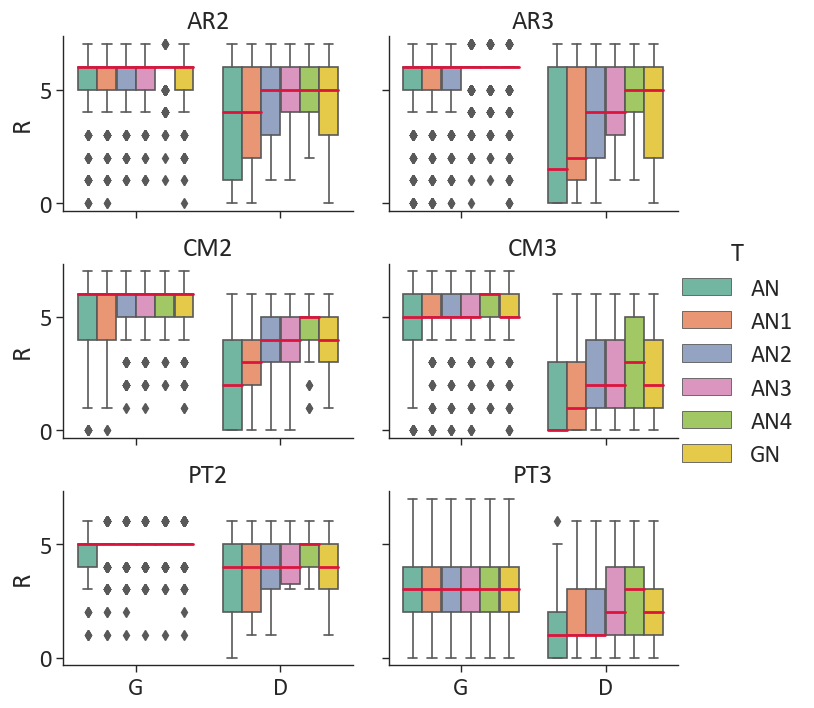

In [28]:
bp = sns.catplot(data=recoms.sort_values(['P', 'S', 'MPT', 'NT']),
                 x='ST',
                 y='#R',
                 kind="box",
                 hue='T',
                 hue_order=['AN', 'AN1', 'AN2', 'AN3', 'AN4', 'GN'],
                 #palette=['red', 'orange', 'yellow', 'forestgreen','blue', 'purple'],
                 palette='Set2',
                 col='S', row='P',
                 #notch=True,
                 medianprops={"color": "crimson", 'linewidth':2},
                 height=3,
                 aspect=1.2)

bp.fig.subplots_adjust(top=0.8)  # adjust the Figure in rp
#bp.fig.suptitle('Boxplot - Nbr of Recommended Courses')
bp.set_titles("{row_name}{col_name}")
bp.set(ylabel ="R", xlabel='')
#bp.axes[0,1].set_xlabel('axes label 2')

#plt.tight_layout()
#bp.savefig(f"{img_path}img/nbr_r_boxplot.png")
#bp.savefig(f"{img_path}img/nbr_r_boxplot.eps")
bp.savefig(f"{img_path}img/nbr_r_boxplot.pdf", dpi=1200)

plt.show()

### Recommended vs Enrolled / Passed

In [29]:
recoms['#R-#E'] = [r-x2 if s==2 else r-x3
                 for s, x2, x3, r in zip(recoms['S'],
                                   recoms['#E_2'], 
                                   recoms['#E_3'], 
                                   recoms['#R'])]
recoms['#R-#P'] = [r-x2 if s==2 else r-x3
                 for s, x2, x3, r in zip(recoms['S'],
                                   recoms['#P_2'], 
                                   recoms['#P_3'], 
                                   recoms['#R'])]

recoms[['ID','S','#R','#E_2','#E_3', '#R-#E', '#P_2','#P_3', '#R-#P']].sample(n=10, random_state=SEED)

,ID,S,#R,#E_2,#E_3,#R-#E,#P_2,#P_3,#R-#P
8464,1974,2,6,6.0,6.0,0.0,6.0,6.0,0.0
7264,421,2,4,5.0,7.0,-1.0,4.0,5.0,0.0
9111,2788,2,5,6.0,6.0,-1.0,5.0,2.0,0.0
1898,1937,2,6,6.0,6.0,0.0,4.0,6.0,2.0
1373,1477,2,6,6.0,6.0,0.0,6.0,5.0,0.0
15433,5246,2,5,5.0,6.0,0.0,5.0,5.0,0.0
2547,2673,2,6,5.0,5.0,1.0,5.0,5.0,1.0
12733,6964,2,3,7.0,9.0,-4.0,0.0,1.0,3.0
11930,6075,2,5,6.0,5.0,-1.0,4.0,4.0,1.0
1654,1695,3,6,6.0,6.0,0.0,6.0,6.0,0.0


In [30]:
ct_e = pd.crosstab([recoms['ST'],recoms['PS']], 
                 recoms['T'],
                values=recoms['#R-#E'], aggfunc='median')
ct_e = pd.concat([ct_e], keys=['R-E'], names='', axis=1)

ct_e

R-E                         
T        AN  AN1  AN2  AN3  AN4   GN
ST PS                               
D  AR2 -2.0 -1.0 -1.0 -1.0  0.0 -1.0
   AR3 -3.0 -2.0 -1.0 -1.0  0.0 -1.0
   CM2 -3.0 -2.0 -1.0 -1.0 -1.0 -1.0
   CM3 -4.0 -3.0 -2.0 -2.0 -1.0 -2.0
   PT2 -2.0 -2.0 -1.0 -1.0 -1.0 -1.0
   PT3 -5.0 -4.0 -4.0 -4.0 -3.0 -4.0
G  AR2  0.0  0.0  0.0  0.0  0.0  0.0
   AR3  0.0  0.0  0.0  0.0  0.0  0.0
   CM2  0.0  0.0  0.0  0.0  0.0  0.0
   CM3 -1.0  0.0  0.0  0.0  0.0  0.0
   PT2  0.0  0.0  0.0  0.0  0.0  0.0
   PT3 -4.0 -4.0 -4.0 -3.0 -3.0 -3.0

In [31]:
ct_p = pd.crosstab([recoms['ST'],recoms['PS']], 
                 recoms['T'],
                values=recoms['#R-#P'], aggfunc='median')
ct_p = pd.concat([ct_p], keys=['R-P'], names='', axis=1)

ct_p

R-P                         
T        AN  AN1  AN2  AN3  AN4   GN
ST PS                               
D  AR2  0.5  1.0  1.0  2.0  2.0  1.0
   AR3  0.0  1.0  2.0  3.0  3.0  2.0
   CM2  0.0  1.0  2.0  2.0  3.0  2.0
   CM3  0.0  0.0  1.0  1.0  2.0  1.0
   PT2  1.0  1.0  1.0  2.0  2.0  1.0
   PT3 -0.5  0.0  0.0  0.0  0.0  0.0
G  AR2  0.0  0.0  0.0  0.0  0.0  0.0
   AR3  0.0  0.0  0.0  0.0  0.0  0.0
   CM2  0.0  0.0  0.0  0.0  0.0  0.0
   CM3  0.0  0.0  0.0  0.0  0.0  0.0
   PT2  0.0  0.0  0.0  0.0  0.0  0.0
   PT3 -3.0 -3.0 -3.0 -3.0 -3.0 -3.0

In [32]:
ct = pd.concat([ct_e, ct_p], axis=1)

ct_styled = ct.style.format('{:.1f}')\
    .set_table_styles(styles)\
    .apply(lambda x: ["background:goldenrod" if v ==0 else "" for v in x], axis = 1)
ct_styled

In [33]:
# get indices and columns

ind_th = 2
col_th = 2

ic = {}

ic = set([i for i in ct.index.names if i != None] +\
          [i for i in ct.columns.names if i != None])

if isinstance(ct.index, pd.MultiIndex):
    for n in np.arange(0, ind_th, 1):
        ind = set([i[n] for i in ct.index])
        ic.update(ind)
else:
    ind = set([i for i in ct.index])
    ic.update(ind)

if isinstance(ct.columns, pd.MultiIndex):
    for n in np.arange(0, col_th, 1):
        ind = set([i[n] for i in ct.columns])
        ic.update(ind)
else:
    ind = set([i for i in ct.columns])
    ic.update(ind)

# print(ic)


styled_latex = ct_styled.to_latex(
    caption='Median difference between the number of courses recommended and the number of courses enrolled in by student status (D, G), neighbor type (AN, GN), program, and semester (PS).',
    label='tab:rec-nbrs',
    position_float='centering',
    multicol_align='c',
    hrules=True)\
    .replace('\\th11pt', '\setlength\extrarowheight{5pt}')\
    .replace('\\td11pt', '\setlength{\\tabcolsep}{4.5pt}')\
    .replace('#', '\#')

add_replace = [('backgroundgoldenrod', 'cellcolor{Goldenrod}')]

if add_replace:
        for val in add_replace:
            styled_latex = styled_latex\
                .replace(val[0], val[1])

for val in ic:
    styled_latex = styled_latex\
        .replace(str(val) + ' ', '\\textbf{' + str(val) + '} ')

print(styled_latex)

\begin{table}
\centering
\caption{Median difference between the number of courses recommended and the number of courses enrolled in by student status (D, G), neighbor type (AN, GN), program, and semester (PS).}
\setlength\extrarowheight{5pt}
\setlength{\tabcolsep}{4.5pt}
\label{tab:rec-nbrs}
\begin{tabular}{llrrrrrrrrrrrr}
\toprule
 &  & \multicolumn{6}{c}{R-E} & \multicolumn{6}{c}{R-P} \\
 & \textbf{T} & \textbf{AN} & \textbf{AN1} & \textbf{AN2} & \textbf{AN3} & \textbf{AN4} & \textbf{GN} & \textbf{AN} & \textbf{AN1} & \textbf{AN2} & \textbf{AN3} & \textbf{AN4} & \textbf{GN} \\
\textbf{ST} & \textbf{PS} &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[c]{6}{*}{D} & \textbf{AR2} & -2.0 & -1.0 & -1.0 & -1.0 & \cellcolor{Goldenrod} 0.0 & -1.0 & 0.5 & 1.0 & 1.0 & 2.0 & 2.0 & 1.0 \\
 & \textbf{AR3} & -3.0 & -2.0 & -1.0 & -1.0 & \cellcolor{Goldenrod} 0.0 & -1.0 & \cellcolor{Goldenrod} 0.0 & 1.0 & 2.0 & 3.0 & 3.0 & 2.0 \\
 & \textbf{CM2} & -3.0 & -2.0 & -1.0 & -1.0 & -1.0 & -1.0 & \

### Number of Correctly Recommended Courses

#### Crosstab

In [34]:
ct_median = pd.crosstab(recoms['PS'], recoms['T'],
            values=recoms['#C'], aggfunc=['median', 'mad'], margins=True)


cols = [(t, sc) for t in TYPES for sc in ['median', 'mad']]
    
ct_median = ct_median.swaplevel(axis=1)[cols]#.sort_index(axis=1)#.drop(columns=['median', 'mad'])

ct_median.columns = pd.MultiIndex.from_tuples([(c[0], c[1].replace('mad', 'Mad').replace('median', 'Med')) for c in ct_median.columns], 
                                              names=('T', '')) 

ct_median.style.format('{:.1f}')\
    .set_table_styles(styles)\
    .background_gradient(cmap='Blues', axis=None, subset=[c for c in ct_median.columns if c[1]=='Med'])\
    .background_gradient(cmap='Oranges', axis=None, subset=[c for c in ct_median.columns if c[1]=='Mad'])

In [35]:
ct_median = pd.crosstab([recoms['ST'], recoms['PS']], recoms['T'],
            values=recoms['#C'], aggfunc=['median', 'mad'], margins=True)


cols = [(t, sc) for t in TYPES for sc in ['median', 'mad']]
    
ct_median = ct_median.swaplevel(axis=1)[cols]#.sort_index(axis=1)#.drop(columns=['median', 'mad'])

ct_median.columns = pd.MultiIndex.from_tuples([(c[0], c[1].replace('mad', 'Mad').replace('median', 'Med')) for c in ct_median.columns], 
                                              names=('T', '')) 

ct_median.style.format('{:.1f}')\
    .set_table_styles(styles)\
    .background_gradient(cmap='Blues', axis=None, subset=[c for c in ct_median.columns if c[1]=='Med'])\
    .background_gradient(cmap='Oranges', axis=None, subset=[c for c in ct_median.columns if c[1]=='Mad'])

#### Boxplot

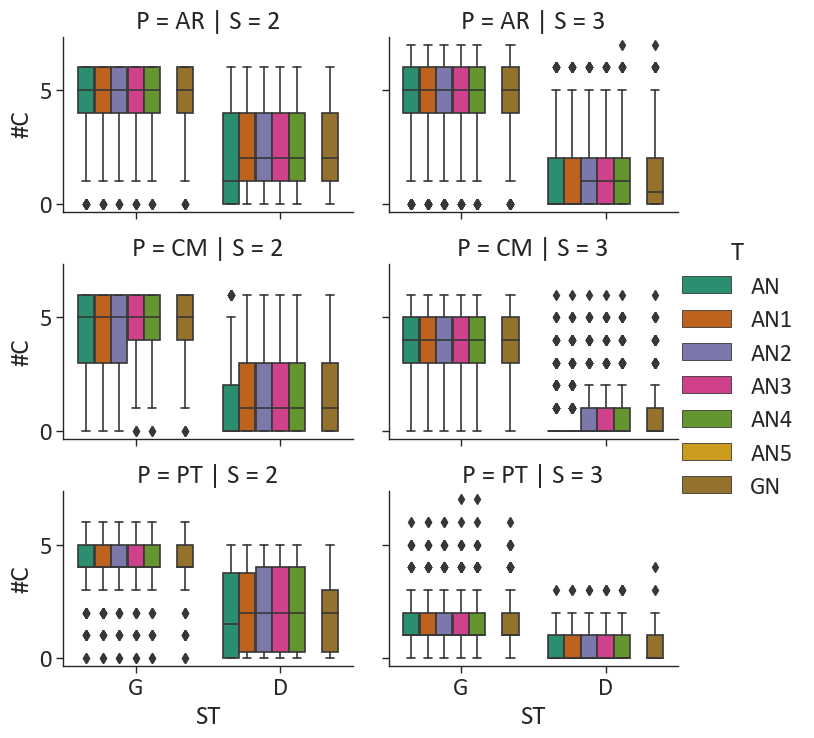

In [36]:
bp = sns.catplot(data=recoms.sort_values(['P', 'S', 'MPT', 'NT']),
                 x='ST',
                 y='#C',
                 kind="box",
                 hue='T',
                 palette='Dark2',
                 hue_order=['AN', 'AN1', 'AN2', 'AN3', 'AN4', 'AN5', 'GN'],
                 col='S', row='P',
                 height=3,
                 aspect=1.2)

bp.fig.subplots_adjust(top=0.8)  # adjust the Figure in rp
#bp.fig.suptitle('Boxplot - Nbr of Correctly Recommended Courses')

#bp.savefig(f"{img_path}img/Nbr_C_Boxplot.png")
#bp.savefig(f"{img_path}img/Nbr_C_Boxplot.eps")

plt.show()

### Neighbors' Distance & Number of Empty Recom Sets

In [46]:
recoms[(recoms['PS']=='CM2')
      & (recoms['T']=='AN3')
      & (recoms['#R']==6)]['ST'].value_counts()

G    185
D     25
Name: ST, dtype: int64

In [47]:
r_d = recoms.groupby(['P', 'S', 'PS', 'ST', 'T','#R'])\
        .agg(Count=('ID', 'nunique'),
             Mean_D=('D_Mean', 'mean'),
             Mean_F1=('F1', 'mean'))\
        .reset_index().rename(columns={'#R': 'N_R'})\

#r_d = pd.pivot(data = r_d, index=['ST', 'PS', 'T'], columns='N_R')

r_d.head()

,P,S,PS,ST,T,N_R,Count,Mean_D,Mean_F1
0,AR,2,AR2,D,AN,0,11,1.599584,0.000000
1,AR,2,AR2,D,AN,1,27,1.411904,0.313580
2,AR,2,AR2,D,AN,2,18,1.799750,0.249471
3,AR,2,AR2,D,AN,3,10,1.940688,0.397619
4,AR,2,AR2,D,AN,4,14,1.690393,0.444558


In [93]:
# excerpt - only one program!

p = 'PT'

data_ = r_d[(r_d['P']==p)]

# get the sum of the two status for barplot
data_agg_ = data_[data_['P']==p]\
    .groupby(['P', 'S', 'PS', 'T',  'N_R'])\
    .agg(Count=('Count', 'sum'))\
    .reset_index().pivot(index=['P', 'S', 'PS', 'T'], 
                           columns='N_R')\
    .fillna(0).stack().reset_index()
data_agg_.head()


# for some N_R there are no students - handle that for correct plot
data_ = data_.pivot_table(index=['P', 'S', 'PS', 'T', 'ST'], 
                          columns='N_R', values='Mean_D')\
    .fillna(-1).stack().reset_index().rename(columns={0: 'Mean_D'})

data_['Mean_D'] = [val if val != -1 else np.nan
                  for val in data_['Mean_D']]

data_[(data_['S']==2) & (data_['T']=='AN4')].head()

,P,S,PS,T,ST,N_R,Mean_D
64,PT,2,PT2,AN4,D,0,NaN
65,PT,2,PT2,AN4,D,1,NaN
66,PT,2,PT2,AN4,D,2,NaN
67,PT,2,PT2,AN4,D,3,3.040500
68,PT,2,PT2,AN4,D,4,4.247433


In [94]:
sems = [2,3] # columns
types = [t for t in TYPES]# if not t in ['AN', 'GN']] # rows

print(round(data_agg_[data_agg_['T'].isin((types))]['Count'].max(),0))
max_count = round(data_agg_[data_agg_['T'].isin((types))]['Count'].max()*1.1,0)
max_dist = round(data_[data_['T'].isin((types))]['Mean_D'].max()*1.1,0)

print(max_count, max_dist)
# 420
# 17

147.0
162.0 17.0


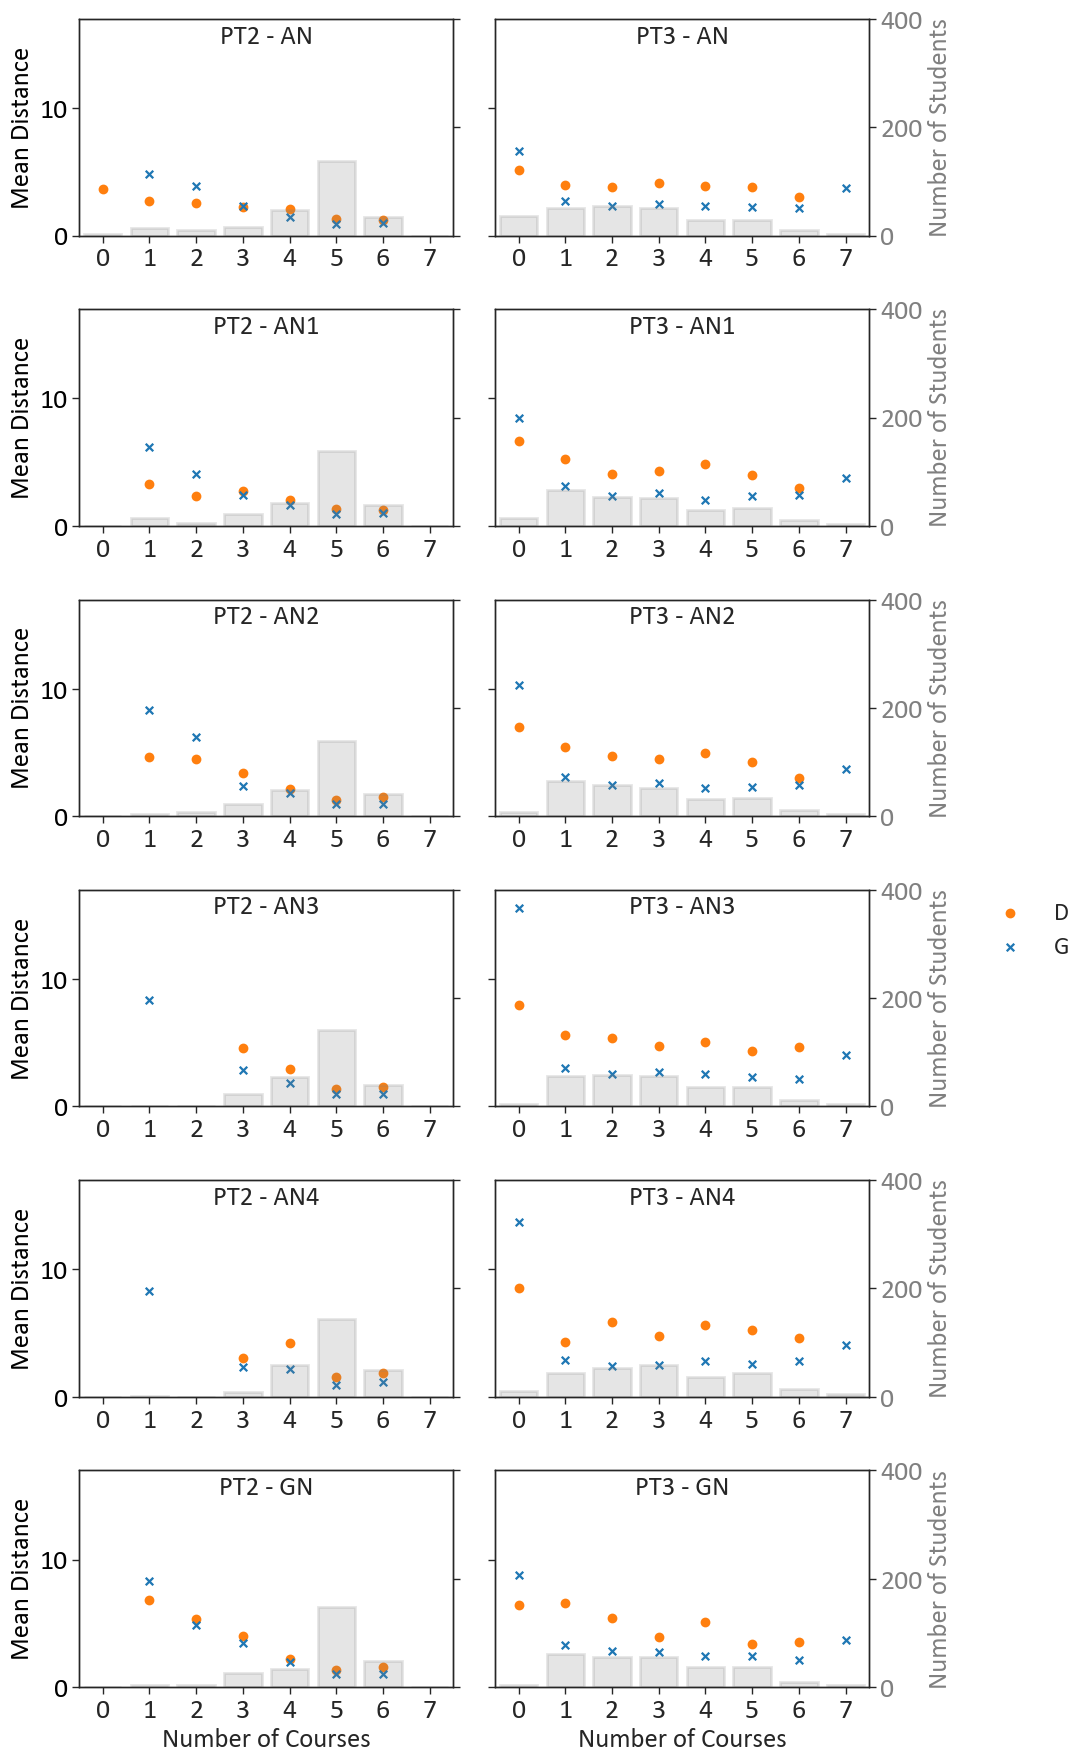

In [95]:
fig = plt.figure(figsize=(10,18)) # breite, höhe

n = 1


for t in types:
    for s in sems:
        #print(t,s)
        data = r_d[(r_d['P']==p) & (r_d['S']==s) & (r_d['T']==t)]

        # plot 1
        ax = fig.add_subplot(len(types), len(sems), n)

        stud_color = 'grey'
        dist_color = 'black'

        g = sns.pointplot(data=data_[(data_['S']==s) & (data_['T']==t)],
                          x='N_R',
                          y='Mean_D',
                          hue='ST',
                          markers=['o', 'x'],
                          join=False,
                          palette=['tab:orange', 'tab:blue'],
                          ax=ax)

        plt.legend([], [], frameon=False)

        #ax.set_title(f'S={s} | P={p} | T={t}')
        ax.set_title(f'{p}{s} - {t}', x=0.5, y=0.85)
        ax.set_ylim([0, 17]) #max_dist
        ax.tick_params(axis='y', labelcolor=dist_color)

        ax.yaxis.set_tick_params(labelsize = 20)

        # plot 2
        ax2 = ax.twinx()
        b = sns.barplot(data=data_agg_[(data_agg_['S']==s) & (data_agg_['T']==t)],
                        x="N_R",
                        y='Count',
                        color=stud_color,
                        #facecolor='white',#(0, 0, 0, 0),
                        edgecolor=stud_color,
                        linewidth=2,
                        alpha=0.2,
                        errorbar=None,
                        ax=ax2)
        
        plt.legend([], [], frameon=False)
        


        #plt.setp(ax2.collections, sizes=[100])
        ax2.set(ylim=(0, 400)) #
        ax2.tick_params(axis='y', labelcolor=stud_color)
        ax2.yaxis.set_tick_params(labelsize = 20)



        # left y axis
        if n in np.arange(1,len(sems)*len(types), len(sems)):#(n == 1) | (n == 5):
            ax.set_ylabel('Mean Distance', color=dist_color)
        else:
            ax.set_ylabel(None)
            ax.set(yticklabels=[])

        # right y axis
        if n in np.arange(len(sems),len(sems)*len(types)+1, len(sems)):
            ax2.set_ylabel('Number of Students', color=stud_color)

        else:
            ax2.set_ylabel(None)
            ax2.set(yticklabels=[])

        if (n <= len(sems)*len(types)-len(sems)):
            ax.set_xlabel(None)
        else:
            ax.set_xlabel('Number of Courses')

        ax.xaxis.set_tick_params(labelsize = 20)


        n += 1
        
handles, labels = ax.get_legend_handles_labels()
lgd = fig.legend(handles,
           labels,
           ncol=1,frameon=False,
                 #loc='center right'
           bbox_to_anchor=(1.11, 0.5)
                 #bbox_to_anchor=(0.5, 0.05)
                )

plt.tight_layout()
#plt.savefig(f'{img_path}img/distance_scatter_{p}.png')
#plt.savefig(f'{img_path}img/distance_scatter_{p}.eps')
plt.savefig(f'{img_path}img/distance_scatter_{p}.pdf', dpi=1200, bbox_inches='tight')

plt.show()

As in EDM paper: the smaller the set sizes, the higher the distance.

In [39]:
pt_d = pd.pivot_table(data = r_d[r_d['ST']=='D'], index=['PS', 'T'], columns='N_R',
        values=['Count', 'Mean_D'])#.fillna('')
pt_d_styled = pt_d.style\
    .format('{:.1f}', subset=[c for c in pt_d.columns if c[0] != 'Count'])\
    .format('{:.0f}', subset=[c for c in pt_d.columns if c[0] == 'Count'])\
    #.set_table_styles(styles)\
    #.background_gradient(cmap='Blues', axis=None, subset=[c for c in pt.columns if c[0]=='Count'])\
    #.background_gradient(cmap='Oranges', axis=None, subset=[c for c in pt.columns if c[0]=='Mean_D'])\
    #.background_gradient(cmap='Greens', axis=None, subset=[c for c in pt.columns if c[0]=='Mean_F1'])\
    #.applymap(lambda x: '' if x == x else 'background-color: lightgrey')
pt_d_styled

In [40]:
pt_g = pd.pivot_table(data = r_d[r_d['ST']=='G'], index=['PS', 'T'], columns='N_R',
        values=['Count', 'Mean_D'])#.fillna('')
pt_g_styled = pt_g.style\
    .format('{:.1f}', subset=[c for c in pt_g.columns if c[0] != 'Count'])\
    .format('{:.0f}', subset=[c for c in pt_g.columns if c[0] == 'Count'])\
    #.set_table_styles(styles)\
    #.background_gradient(cmap='Blues', axis=None, subset=[c for c in pt.columns if c[0]=='Count'])\
    #.background_gradient(cmap='Oranges', axis=None, subset=[c for c in pt.columns if c[0]=='Mean_D'])\
    #.background_gradient(cmap='Greens', axis=None, subset=[c for c in pt.columns if c[0]=='Mean_F1'])\
    #.applymap(lambda x: '' if x == x else 'background-color: lightgrey')
pt_g_styled

In [41]:
# get indices and columns
pt = pt_g
pt_styled = pt_g_styled

ic = {}
ind_th = 2
col_th = 1

ic = set([i for i in pt.index.names if i != None] +\
          [i for i in pt.columns.names if i != None])

if isinstance(pt.index, pd.MultiIndex):
    for n in np.arange(0, ind_th, 1):
        ind = set([i[n] for i in pt.index])
        ic.update(ind)
else:
    ind = set([i for i in pt.index])
    ic.update(ind)

if isinstance(pt.columns, pd.MultiIndex):
    for n in np.arange(0, col_th, 1):
        ind = set([i[n] for i in pt.columns])
        ic.update(ind)
else:
    ind = set([i for i in pt.columns])
    ic.update(ind)
    
styled_latex = pt_styled.to_latex(
        caption='Number of students and mean distance by...',
        label='tab:n-r-mean-d',
        position_float='centering',
        multicol_align='c',
        hrules=True)\
        .replace('\\th11pt', '\setlength\extrarowheight{5pt}')\
        .replace('\\td11pt', '\setlength{\\tabcolsep}{4.5pt}')\
        .replace('#', '\#')

for val in ic:
    styled_latex = styled_latex\
        .replace(str(val) + ' ', '\\textbf{' + str(val) + '} ')
print(styled_latex)

\begin{table}
\centering
\caption{Number of students and mean distance by...}
\label{tab:n-r-mean-d}
\begin{tabular}{llrrrrrrrrrrrrrrrr}
\toprule
 &  & \multicolumn{8}{c}{Count} & \multicolumn{8}{c}{Mean_D} \\
 & \textbf{N_R} & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 \\
\textbf{PS} & \textbf{T} &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[c]{6}{*}{AR2} & \textbf{AN} & 5 & 14 & 7 & 10 & 28 & 84 & 292 & 4 & 3.4 & 2.9 & 1.8 & 1.7 & 2.1 & 0.9 & 0.6 & 1.0 \\
 & \textbf{AN1} & 2 & 9 & 7 & 15 & 29 & 86 & 292 & 4 & 2.0 & 2.7 & 2.9 & 2.4 & 2.1 & 0.9 & 0.6 & 1.0 \\
 & \textbf{AN2} & nan & 5 & 11 & 11 & 30 & 86 & 297 & 4 & nan & 3.3 & 2.8 & 1.9 & 2.5 & 0.9 & 0.6 & 1.0 \\
 & \textbf{AN3} & nan & 4 & 3 & 10 & 32 & 87 & 303 & 5 & nan & 5.2 & 1.9 & 2.5 & 2.5 & 1.0 & 0.6 & 1.0 \\
 & \textbf{AN4} & nan & 1 & 1 & 4 & 20 & 83 & 330 & 5 & nan & 9.0 & 4.0 & 3.9 & 3.1 & 1.3 & 0.7 & 1.1 \\
 & \textbf{GN} & 1 & 2 & 12 & 10 & 27 & 69 & 317 & 6 & 2.8 & 2.4 & 3.8 & 

### Tests

#### Power Analysis

##### Subgroup Sizes

In [96]:
pd.crosstab(recoms['ST'], recoms['P'], 
            values=recoms['ID'], aggfunc='nunique',
           margins=True)\
    .style.set_table_styles(styles)\
    .format('{:.0f}')

P,AR,CM,PT,All
ST,,,,
D,134,221,58,413
G,444,306,203,953
All,578,527,261,1366


##### Mean Differences

In [97]:
power_df = recoms.pivot_table(index=['P', 'S', 'PS', 'ID', 'ST'], 
                              columns='T', 
                              values=['#R', '#C', 'F1'])

for val in ['#R', '#C', 'F1']:
    for appr in ['AN', 'AN1', 'AN2', 'AN3', 'AN4']:
        
        power_df[(val, f'GN_{appr}')] = power_df[(val, 'GN')]-power_df[(val, appr)]

#power_df = power_df.sort_index(axis=1)
power_df = power_df.stack().reset_index()
power_df = power_df[power_df['T'].str.contains('_')].reset_index(drop=True)
power_df.sample(10)

,P,S,PS,ID,ST,T,#C,#R,F1
9652,CM,3,CM3,3679,D,GN_AN2,0,0,0.0
13197,PT,3,PT3,4586,G,GN_AN2,0,0,0.0
4018,AR,3,AR3,2825,G,GN_AN3,0,0,0.0
11384,PT,2,PT2,1624,D,GN_AN4,0,0,0.0
12794,PT,3,PT3,2266,G,GN_AN4,0,0,0.0
13258,PT,3,PT3,5216,G,GN_AN3,0,0,0.0
2351,AR,2,AR2,6117,G,GN_AN1,0,0,0.0
5831,CM,2,CM2,112,G,GN_AN1,0,0,0.0
2325,AR,2,AR2,6070,G,GN_AN,0,0,0.0
2083,AR,2,AR2,5437,G,GN_AN3,0,0,0.0


In [98]:
ct = pd.crosstab([power_df['ST'], power_df['PS']],power_df['T'], 
            values=power_df['#R'], aggfunc=['mean', 'std'],
           #margins=True
           )
ct.style.set_table_styles(styles)\
    .background_gradient(cmap='PiYG', vmin=-1, vmax=1, axis=None,
                        subset=[c for c in ct.columns if c[0]=='mean'])\
    .background_gradient(cmap='Blues', axis=None,
                        subset=[c for c in ct.columns if c[0]=='std'])\
    .format('{:.3f}')

#### def test_stat_sign()

In [99]:
def test_stat_sign(df, to_test, level):

    p_vals = []

    if level == 'o':  # overall
        for comp in to_compare:

            res = stats.wilcoxon(df[df['T'] == comp[0]][to_test],
                                 df[df['T'] == comp[1]][to_test],
                                 alternative='two-sided')
            stat = res[0]
            p_v = res[1]

            p_vals.append([comp[1], round(p_v, 5)])

        p_vals = pd.DataFrame(p_vals, columns=['T', 'P_Values'])\
            .set_index('T').T
        #.pivot_table(, columns='T2', values='P_Values')

    elif level == 'ps':  # program + semester
        for comp in to_compare:

            for ps in df['PS'].unique():

                data = df[(df['PS'] == ps)]

                res = stats.wilcoxon(data[data['T'] == comp[0]][to_test],
                                     data[data['T'] == comp[1]][to_test],
                                     alternative='two-sided')
                stat = res[0]
                p_v = res[1]

                p_vals.append([comp[1], ps, round(p_v, 5)])
        p_vals = pd.DataFrame(p_vals, columns=['T', 'PS', 'P_Values'])\
            .pivot_table(index=['PS'], columns='T', values='P_Values')

    elif level == 'st':  # student status
        for comp in to_compare:

            for ps in df['PS'].unique():

                for st in df['ST'].unique():

                    data = df[(df['PS'] == ps) & (df['ST'] == st)]

                    res = stats.wilcoxon(data[data['T'] == comp[0]][to_test],
                                         data[data['T'] == comp[1]][to_test],
                                         alternative='two-sided',
                                        #zero_method='zsplit'
                                        )
                    stat = res[0]
                    p_v = res[1]

                    p_vals.append([comp[1], ps, st, round(p_v, 5)])
                    
            
        p_vals = pd.DataFrame(p_vals, columns=['T', 'PS', 'ST','P_Values'])\
            .pivot_table(index=['ST','PS'], columns='T', values='P_Values')
    p_vals.columns = pd.MultiIndex.from_product([[to_test], p_vals.columns])

    return p_vals


to_test = '#R'
df = recoms

to_test = 'PR2'
df = pred_data

p_vals = test_stat_sign(df,to_test, 'st')
p_vals.style.set_table_styles(styles)\
        .format('{:.3f}')\
        .set_properties(**{'background-color': 'white'})\
        .apply(lambda x: ["background:goldenrod" if v > 0.05 else "" for v in x], axis = 1)

#### Dropout Pred

In [119]:
to_test = 'PR2'

# just for the plot
pred_data['PR2_binned'] = pd.cut(pred_data['PR2'], 10) 
pred_data[['PR2','PR2_binned']].sample(n=10,random_state=SEED)

,PR2,PR2_binned
3092,0.83000,"(0.8, 0.9]"
2665,0.19357,"(0.1, 0.2]"
2971,0.21000,"(0.2, 0.3]"
2565,0.02000,"(-0.001, 0.1]"
3152,0.02000,"(-0.001, 0.1]"
1795,0.83000,"(0.8, 0.9]"
2311,0.54000,"(0.5, 0.6]"
1687,0.44000,"(0.4, 0.5]"
764,0.09000,"(-0.001, 0.1]"
1160,0.10000,"(-0.001, 0.1]"


##### Normality

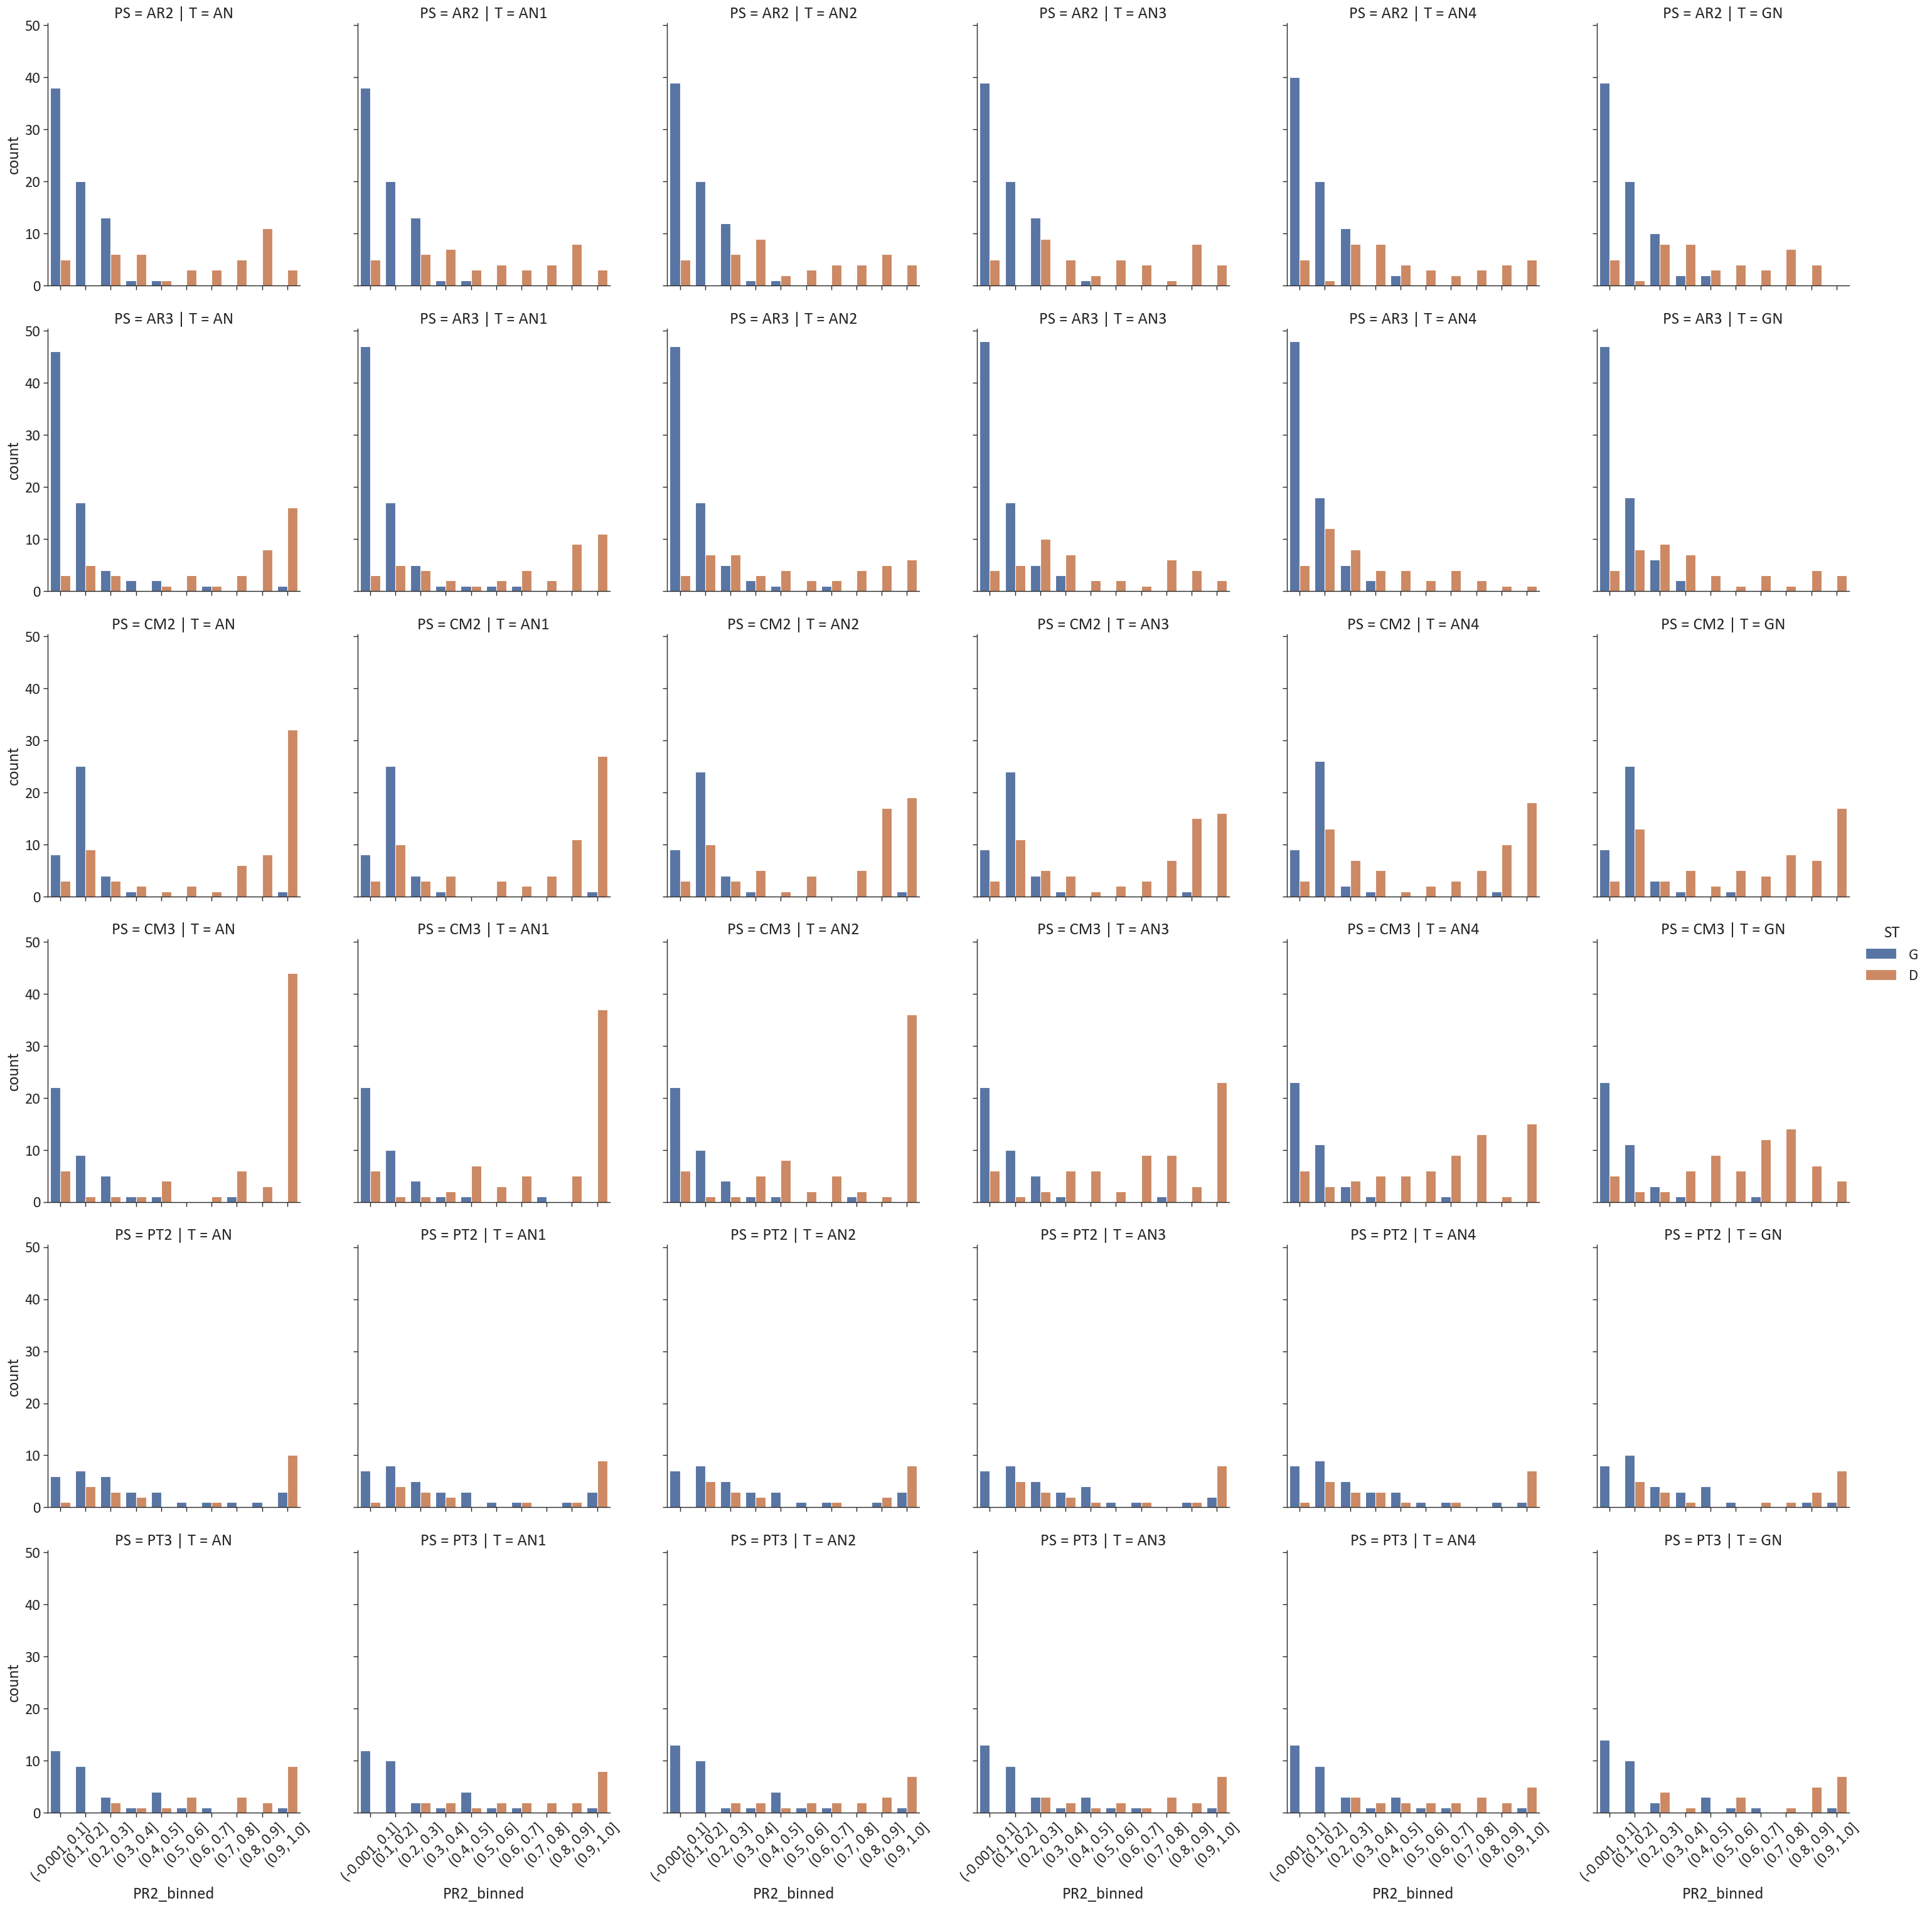

In [120]:
cp = sns.catplot(data=pred_data, x='PR2_binned', kind="count",
            col='T', row='PS',
           hue='ST')

loc, labels = plt.xticks()
cp.set_xticklabels(labels, rotation=45)
plt.show()

In [121]:
for st in ['D', 'G']:
    
    for ps in pred_data['PS'].unique():
    
        for t in TYPES:
    
            res = stats.kstest(pred_data[(pred_data['ST']==st) 
                                      & (pred_data['PS']==ps) 
                                      & (pred_data['T']==t)][to_test], 'norm') #p-value near zero rejects normality
            stat = res[0]
            p_v = res[1]
            #print(res)
            print(f'{st} - {ps} - {t: <3}: statistic: {stat:.3f} - p-value {p_v:.3f}')

D - AR2 - AN : statistic: 0.504 - p-value 0.000
D - AR2 - AN1: statistic: 0.504 - p-value 0.000
D - AR2 - AN2: statistic: 0.504 - p-value 0.000
D - AR2 - AN3: statistic: 0.504 - p-value 0.000
D - AR2 - AN4: statistic: 0.504 - p-value 0.000
D - AR2 - GN : statistic: 0.504 - p-value 0.000
D - AR3 - AN : statistic: 0.500 - p-value 0.000
D - AR3 - AN1: statistic: 0.500 - p-value 0.000
D - AR3 - AN2: statistic: 0.500 - p-value 0.000
D - AR3 - AN3: statistic: 0.500 - p-value 0.000
D - AR3 - AN4: statistic: 0.500 - p-value 0.000
D - AR3 - GN : statistic: 0.500 - p-value 0.000
D - CM2 - AN : statistic: 0.531 - p-value 0.000
D - CM2 - AN1: statistic: 0.531 - p-value 0.000
D - CM2 - AN2: statistic: 0.531 - p-value 0.000
D - CM2 - AN3: statistic: 0.531 - p-value 0.000
D - CM2 - AN4: statistic: 0.531 - p-value 0.000
D - CM2 - GN : statistic: 0.531 - p-value 0.000
D - CM3 - AN : statistic: 0.555 - p-value 0.000
D - CM3 - AN1: statistic: 0.525 - p-value 0.000
D - CM3 - AN2: statistic: 0.517 - p-valu

##### Significance

In [122]:
p_vals_dr = test_stat_sign(pred_data, to_test, 'st')

p_vals_dr_styled = p_vals_dr.style.set_table_styles(styles)\
        .format('{:.3f}')\
        .apply(lambda x: ["background:goldenrod" if v > 0.05 else "" for v in x], axis = 1)
p_vals_dr_styled

#### Number of Recommended Courses #R

In [123]:
to_test = '#R'

##### Normality

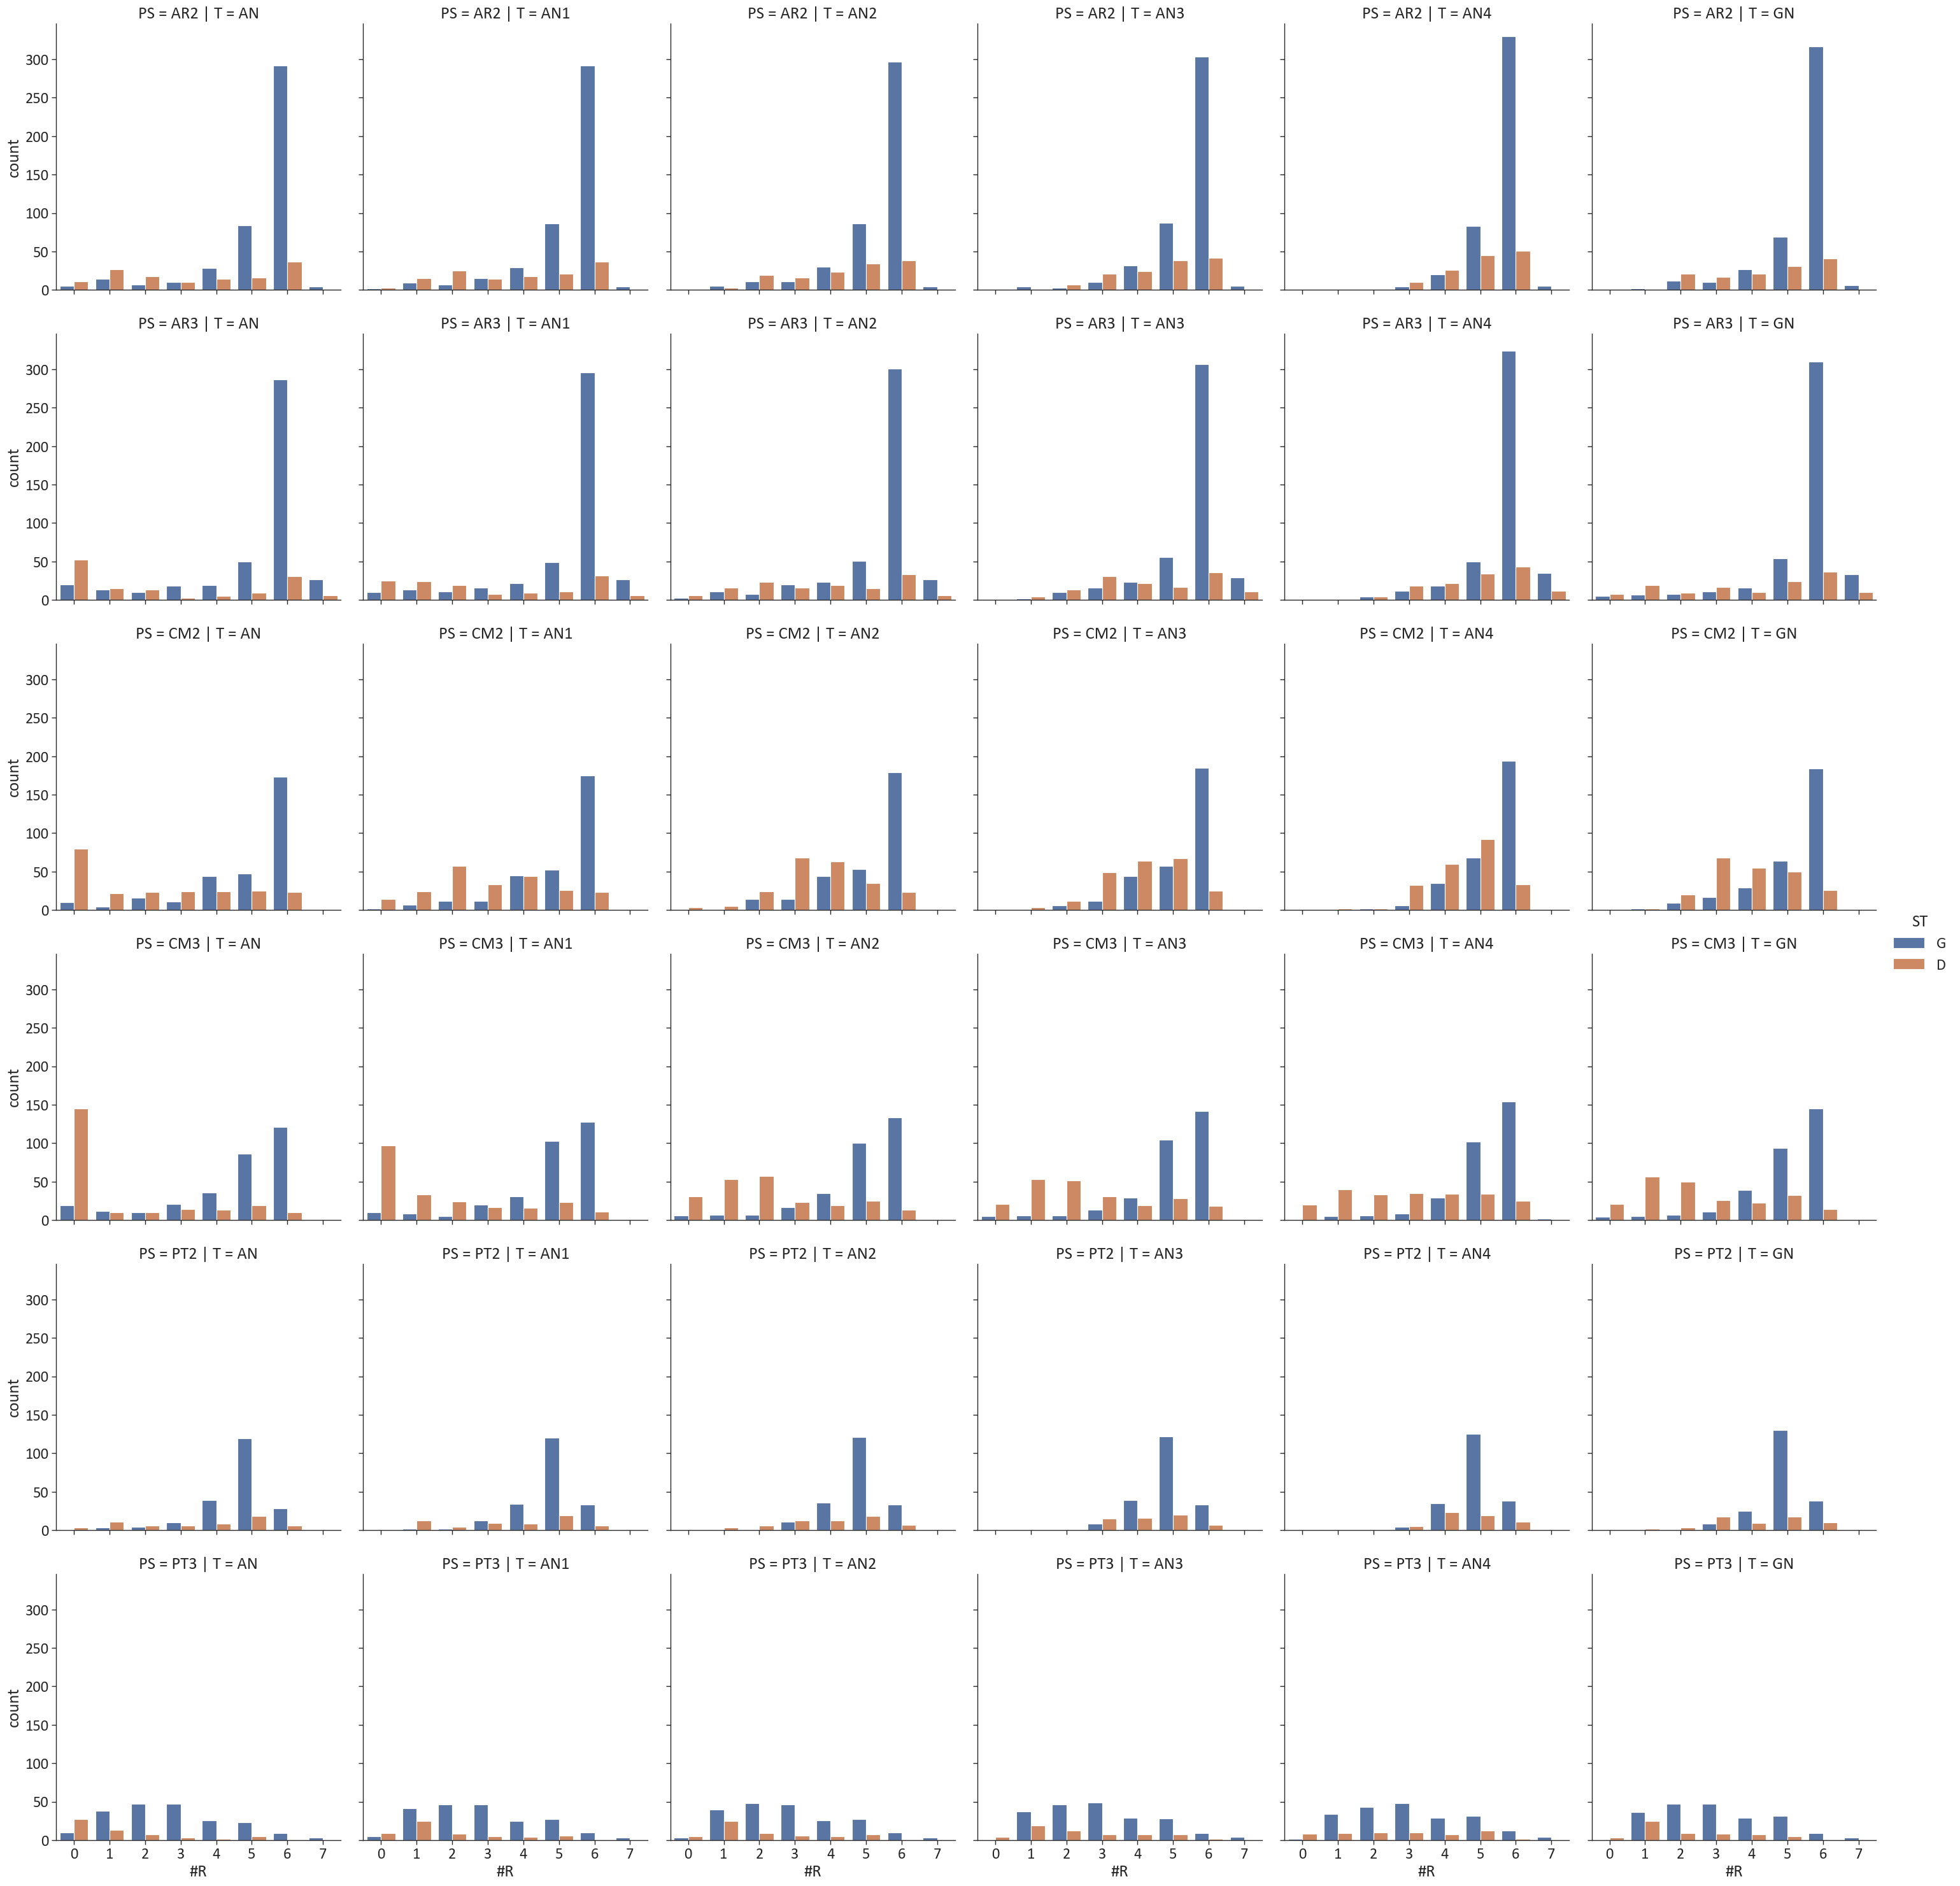

In [124]:
sns.catplot(data=recoms, x=to_test, kind="count",
            col='T', row='PS',
           hue='ST')
plt.show()

In [125]:
for st in ['D', 'G']:
    
    for ps in recoms['PS'].unique():
    
        for t in TYPES:
    
            res = stats.kstest(recoms[(recoms['ST']==st) 
                                      & (recoms['PS']==ps) 
                                      & (recoms['T']==t)][to_test], 'norm') #p-value near zero rejects normality
            stat = res[0]
            p_v = res[1]
            #print(res)
            print(f'{st} - {ps} - {t: <3}: statistic: {stat:.3f} - p-value {p_v:.3f}')

D - AR2 - AN : statistic: 0.759 - p-value 0.000
D - AR2 - AN1: statistic: 0.843 - p-value 0.000
D - AR2 - AN2: statistic: 0.955 - p-value 0.000
D - AR2 - AN3: statistic: 0.970 - p-value 0.000
D - AR2 - AN4: statistic: 0.991 - p-value 0.000
D - AR2 - GN : statistic: 0.962 - p-value 0.000
D - AR3 - AN : statistic: 0.500 - p-value 0.000
D - AR3 - AN1: statistic: 0.655 - p-value 0.000
D - AR3 - AN2: statistic: 0.813 - p-value 0.000
D - AR3 - AN3: statistic: 0.947 - p-value 0.000
D - AR3 - AN4: statistic: 0.970 - p-value 0.000
D - AR3 - GN : statistic: 0.782 - p-value 0.000
D - CM2 - AN : statistic: 0.516 - p-value 0.000
D - CM2 - AN1: statistic: 0.805 - p-value 0.000
D - CM2 - AN2: statistic: 0.941 - p-value 0.000
D - CM2 - AN3: statistic: 0.959 - p-value 0.000
D - CM2 - AN4: statistic: 0.981 - p-value 0.000
D - CM2 - GN : statistic: 0.968 - p-value 0.000
D - CM3 - AN : statistic: 0.500 - p-value 0.000
D - CM3 - AN1: statistic: 0.500 - p-value 0.000
D - CM3 - AN2: statistic: 0.701 - p-valu

##### Significance

In [126]:
p_vals_r = test_stat_sign(recoms, to_test, 'st')
p_vals_r_styled = p_vals_r.style.set_table_styles(styles)\
        .format('{:.3f}')\
        .apply(lambda x: ["background:goldenrod" if v > 0.05 else "" for v in x], axis = 1)
p_vals_r_styled

#### Difference #R-#E

In [127]:
to_test = '#R-#E'

##### Normality

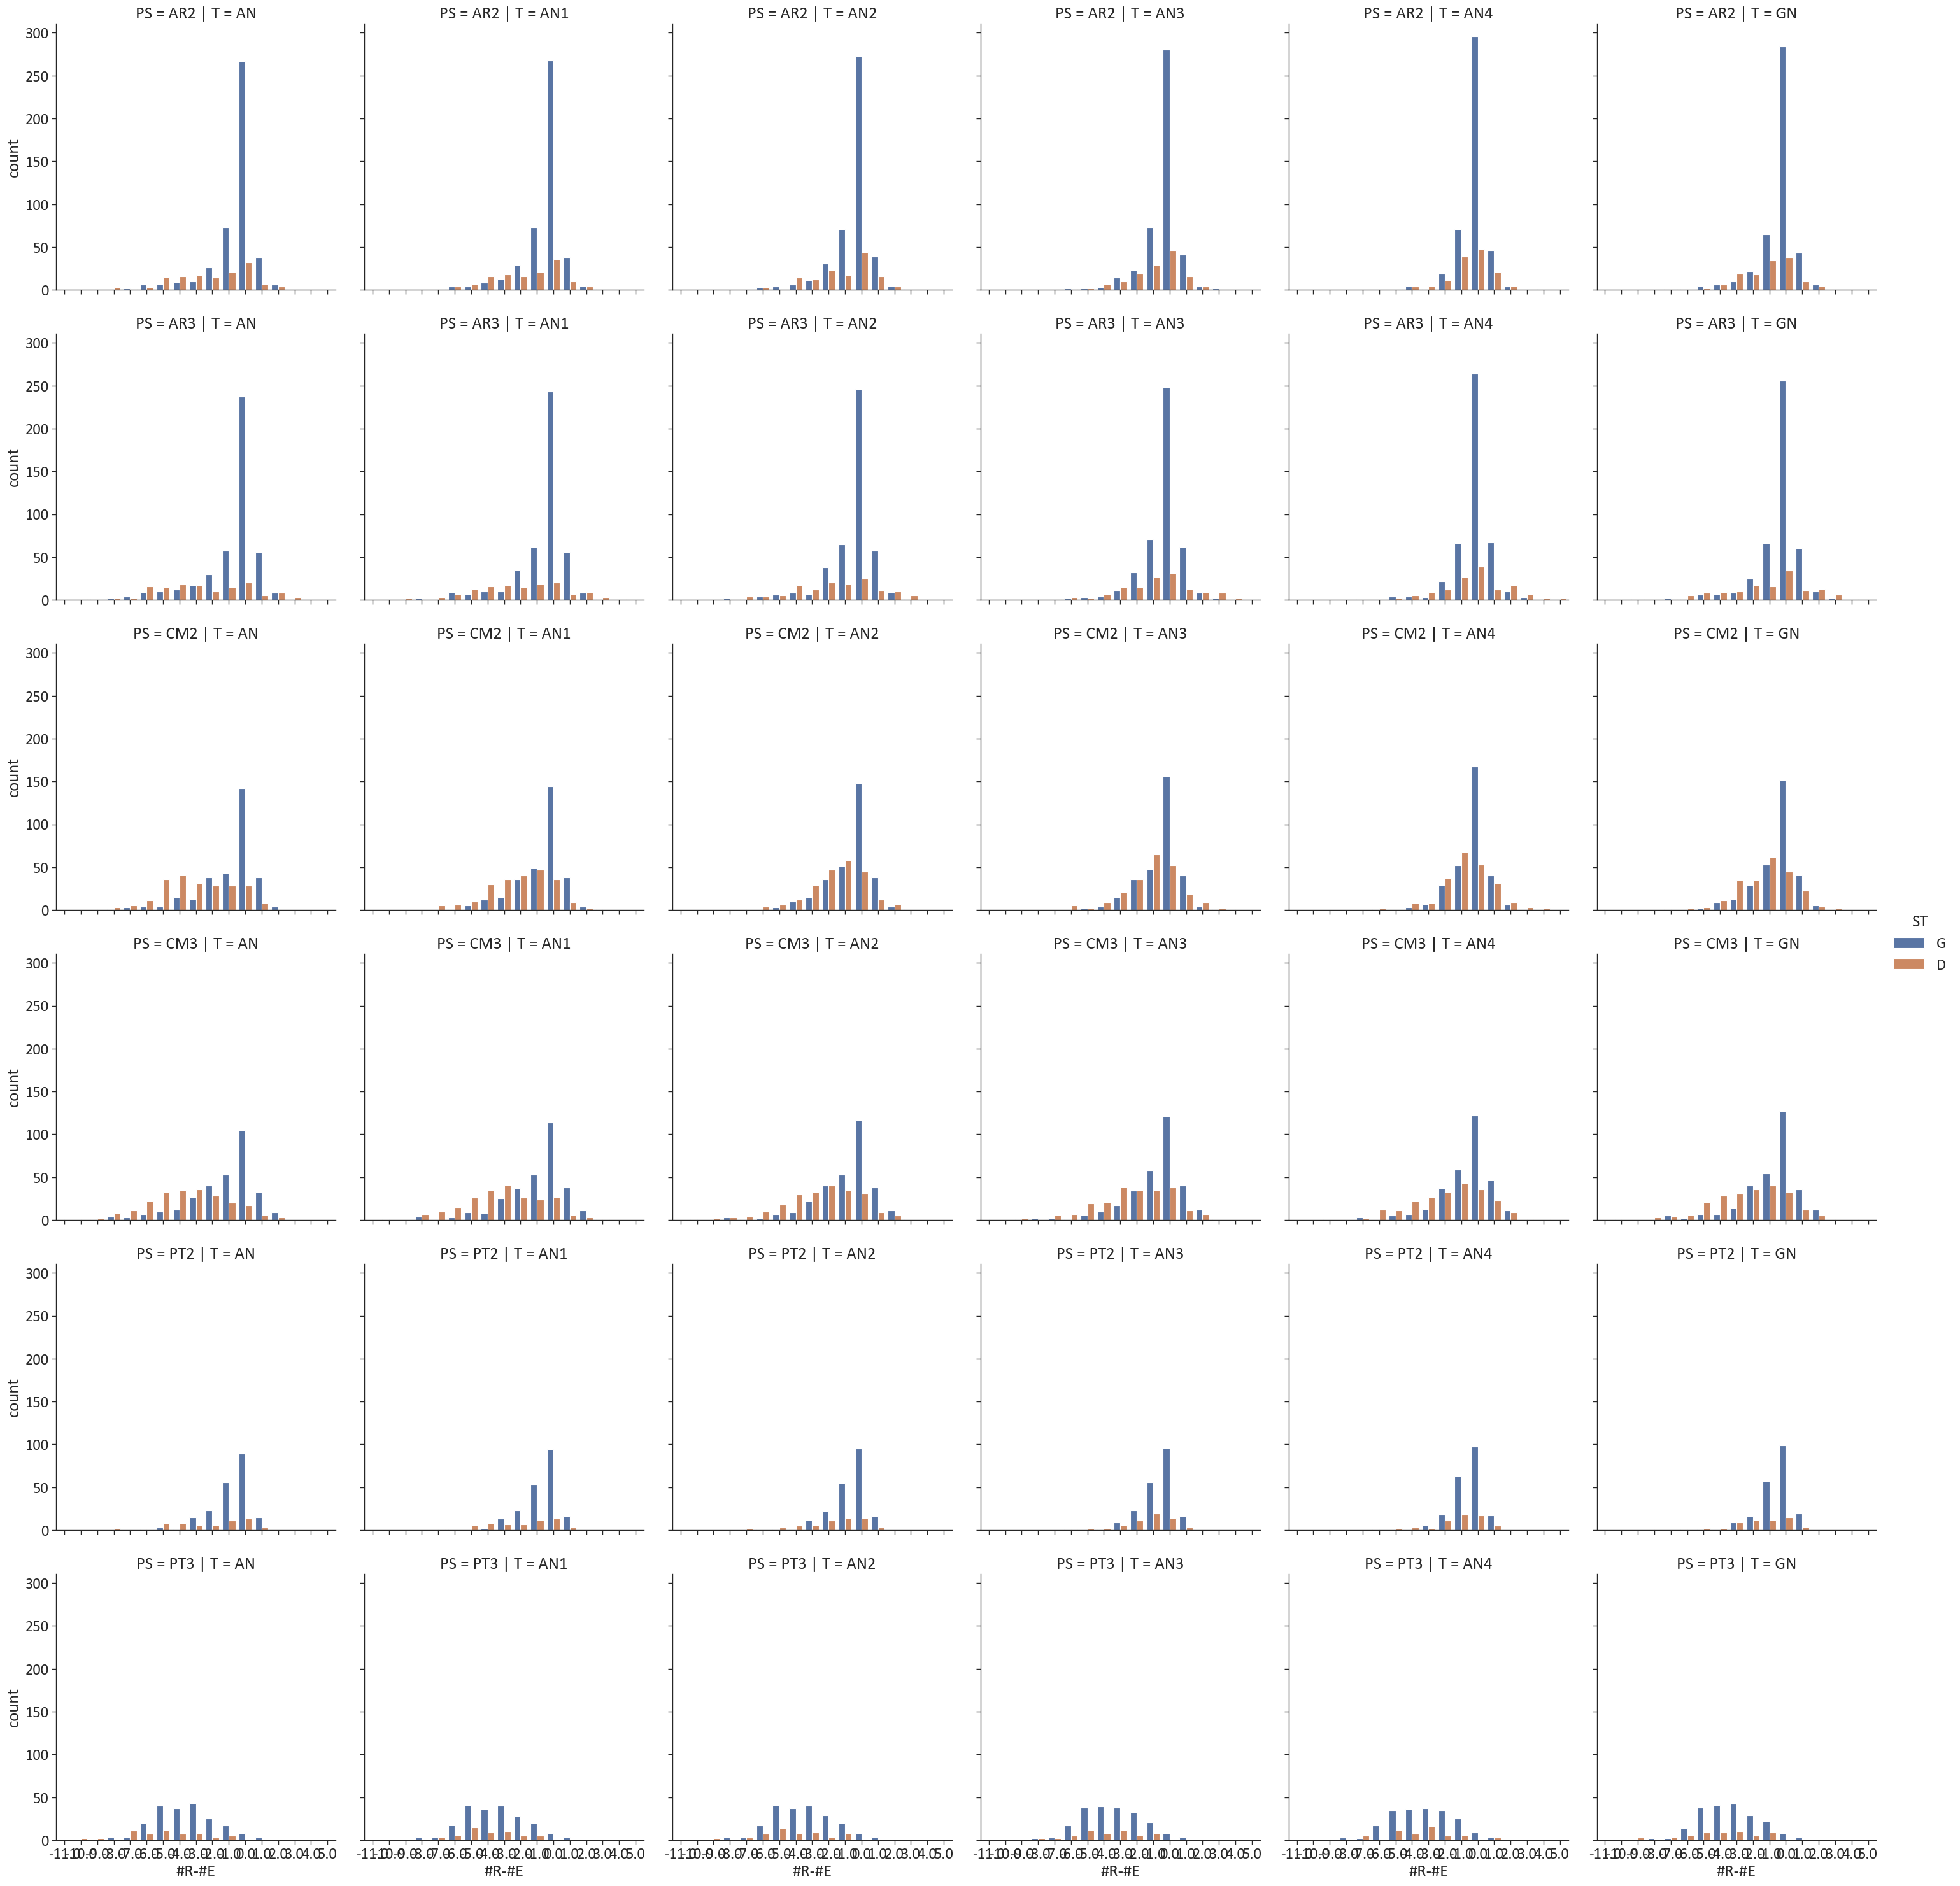

In [128]:
sns.catplot(data=recoms, x=to_test, kind="count",
            col='T', row='PS',
           hue='ST')
plt.show()

In [129]:
for st in ['D', 'G']:
    
    for ps in recoms['PS'].unique():
    
        for t in TYPES:
    
            res = stats.kstest(recoms[(recoms['ST']==st) 
                                      & (recoms['PS']==ps) 
                                      & (recoms['T']==t)][to_test], 'norm') #p-value near zero rejects normality
            stat = res[0]
            p_v = res[1]
            #print(res)
            print(f'{st} - {ps} - {t: <3}: statistic: {stat:.3f} - p-value {p_v:.3f}')

D - AR2 - AN : statistic: 0.520 - p-value 0.000
D - AR2 - AN1: statistic: 0.468 - p-value 0.000
D - AR2 - AN2: statistic: 0.373 - p-value 0.000
D - AR2 - AN3: statistic: 0.351 - p-value 0.000
D - AR2 - AN4: statistic: 0.306 - p-value 0.000
D - AR2 - GN : statistic: 0.446 - p-value 0.000
D - AR3 - AN : statistic: 0.589 - p-value 0.000
D - AR3 - AN1: statistic: 0.535 - p-value 0.000
D - AR3 - AN2: statistic: 0.446 - p-value 0.000
D - AR3 - AN3: statistic: 0.364 - p-value 0.000
D - AR3 - AN4: statistic: 0.252 - p-value 0.000
D - AR3 - GN : statistic: 0.365 - p-value 0.000
D - CM2 - AN : statistic: 0.683 - p-value 0.000
D - CM2 - AN1: statistic: 0.629 - p-value 0.000
D - CM2 - AN2: statistic: 0.552 - p-value 0.000
D - CM2 - AN3: statistic: 0.466 - p-value 0.000
D - CM2 - AN4: statistic: 0.398 - p-value 0.000
D - CM2 - GN : statistic: 0.511 - p-value 0.000
D - CM3 - AN : statistic: 0.769 - p-value 0.000
D - CM3 - AN1: statistic: 0.701 - p-value 0.000
D - CM3 - AN2: statistic: 0.633 - p-valu

##### Significance

In [130]:
p_vals_re = test_stat_sign(recoms, to_test, 'st')
p_vals_re_styled = p_vals_re.style.set_table_styles(styles)\
        .format('{:.3f}')\
        .apply(lambda x: ["background:goldenrod" if v > 0.05 else "" for v in x], axis = 1)
p_vals_re_styled

#### Intersection

In [131]:
to_test = 'F1'

# just for the plot
recoms['F1_binned'] = pd.cut(recoms['F1'], 10) 
recoms[['F1','F1_binned']].sample(n=10,random_state=SEED)

,F1,F1_binned
8464,1.000000,"(0.9, 1.0]"
7264,1.000000,"(0.9, 1.0]"
9111,0.800000,"(0.7, 0.8]"
1898,0.800000,"(0.7, 0.8]"
1373,1.000000,"(0.9, 1.0]"
15433,1.000000,"(0.9, 1.0]"
2547,0.909091,"(0.9, 1.0]"
12733,0.000000,"(-0.001, 0.1]"
11930,0.888889,"(0.8, 0.9]"
1654,1.000000,"(0.9, 1.0]"


##### Normality

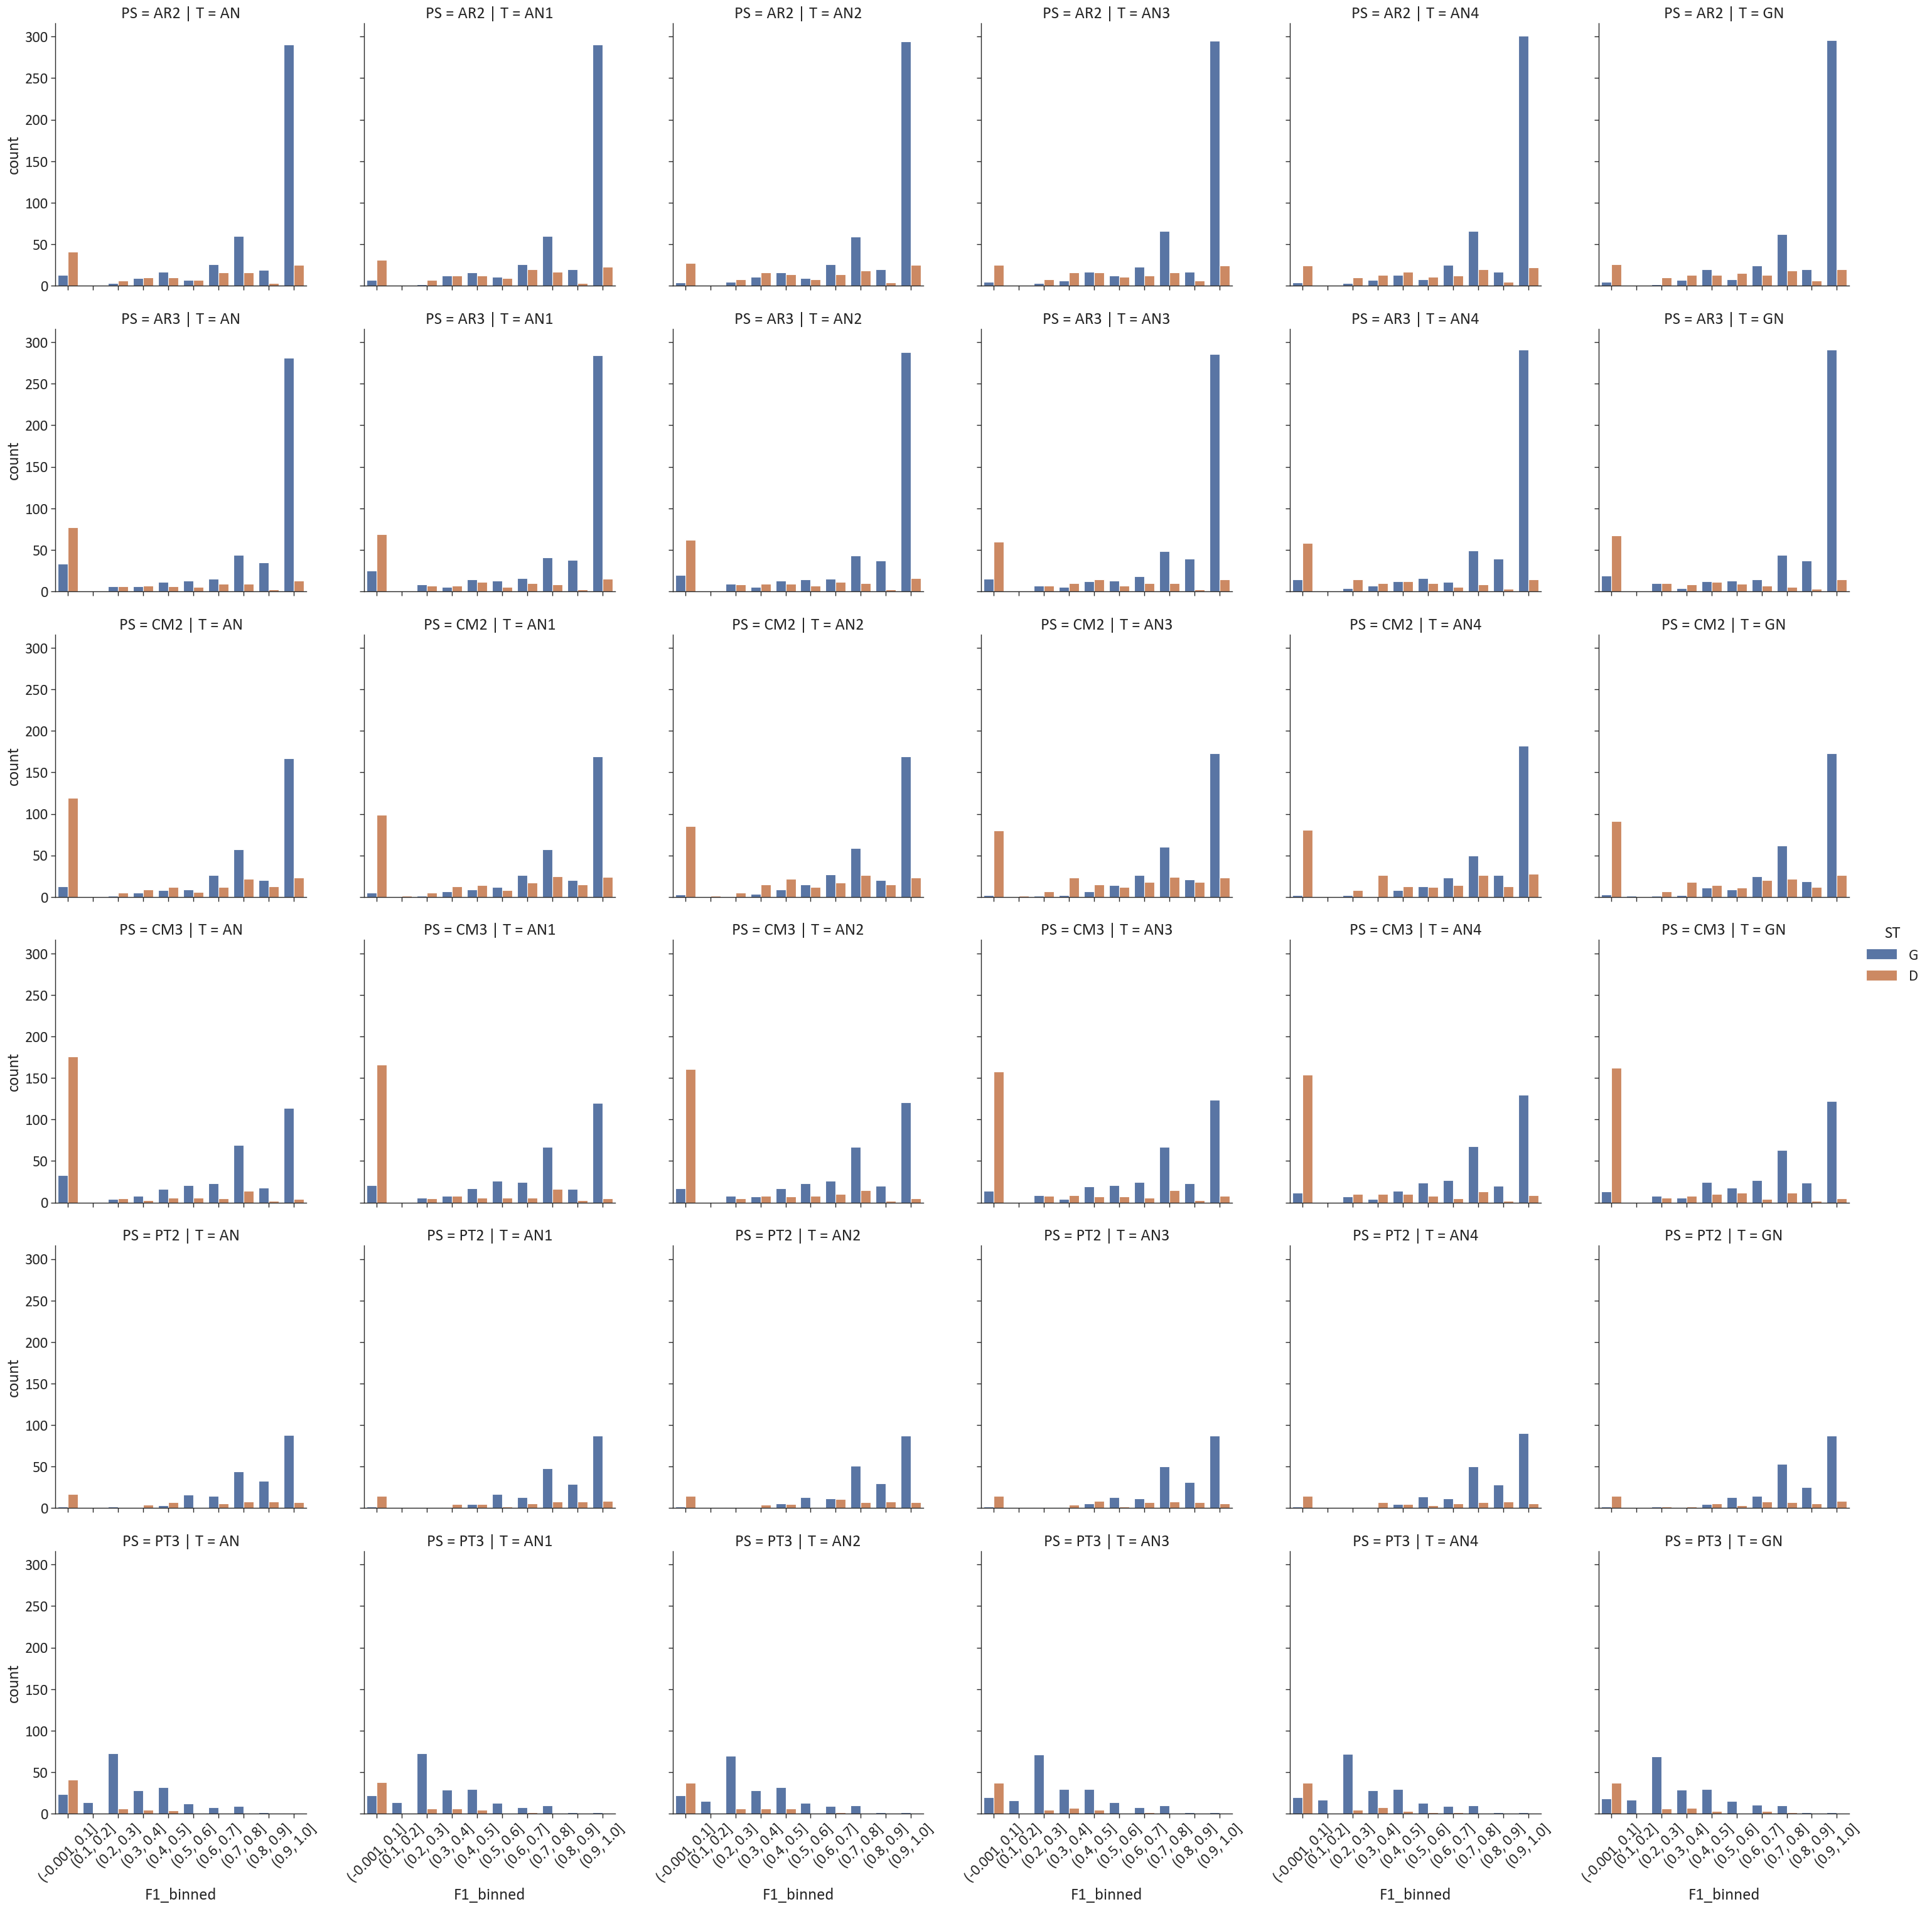

In [132]:
cp = sns.catplot(data=recoms,
                 x='F1_binned',
                 kind="count",
                 col='T',
                 row='PS',
                 hue='ST')

loc, labels = plt.xticks()
cp.set_xticklabels(labels, rotation=45)

plt.show()

In [133]:
for st in ['D', 'G']:
    
    for ps in recoms['PS'].unique():
    
        for t in TYPES:
    
            res = stats.kstest(recoms[(recoms['ST']==st) 
                                      & (recoms['PS']==ps) 
                                      & (recoms['T']==t)][to_test], 'norm') #p-value near zero rejects normality
            stat = res[0]
            p_v = res[1]
            #print(res)
            print(f'{st} - {ps} - {t: <3}: statistic: {stat:.3f} - p-value {p_v:.3f}')

D - AR2 - AN : statistic: 0.500 - p-value 0.000
D - AR2 - AN1: statistic: 0.500 - p-value 0.000
D - AR2 - AN2: statistic: 0.500 - p-value 0.000
D - AR2 - AN3: statistic: 0.500 - p-value 0.000
D - AR2 - AN4: statistic: 0.500 - p-value 0.000
D - AR2 - GN : statistic: 0.500 - p-value 0.000
D - AR3 - AN : statistic: 0.500 - p-value 0.000
D - AR3 - AN1: statistic: 0.500 - p-value 0.000
D - AR3 - AN2: statistic: 0.500 - p-value 0.000
D - AR3 - AN3: statistic: 0.500 - p-value 0.000
D - AR3 - AN4: statistic: 0.500 - p-value 0.000
D - AR3 - GN : statistic: 0.500 - p-value 0.000
D - CM2 - AN : statistic: 0.500 - p-value 0.000
D - CM2 - AN1: statistic: 0.500 - p-value 0.000
D - CM2 - AN2: statistic: 0.500 - p-value 0.000
D - CM2 - AN3: statistic: 0.500 - p-value 0.000
D - CM2 - AN4: statistic: 0.500 - p-value 0.000
D - CM2 - GN : statistic: 0.500 - p-value 0.000
D - CM3 - AN : statistic: 0.500 - p-value 0.000
D - CM3 - AN1: statistic: 0.500 - p-value 0.000
D - CM3 - AN2: statistic: 0.500 - p-valu

##### Significance

In [134]:
p_vals_f = test_stat_sign(recoms, to_test, 'st')
p_vals_f_styled = p_vals_f.style.set_table_styles(styles)\
        .format('{:.3f}')\
        .apply(lambda x: ["background:goldenrod" if v > 0.05 else "" for v in x], axis = 1)
p_vals_f_styled

#### Merge

In [184]:
p_vals_all = pd.concat([p_vals_dr, p_vals_f, p_vals_r], axis=1)
#p_vals_all = p_vals_all.swaplevel(axis=1).sort_index(axis=1).T

p_vals_all.loc[('Count', '>= 0.05'), :] = p_vals_all[p_vals_all >= 0.05].count()

p_vals_all

PR2                                           F1           \
T                   AN      AN1      AN2      AN3      AN4       AN      AN1   
ST    PS                                                                       
D     AR2      0.00006  0.00008  0.00023  0.00039  0.03342  0.04871  0.58016   
      AR3      0.00000  0.00000  0.00082  0.33168  0.00704  0.06591  0.82494   
      CM2      0.00000  0.00000  0.00018  0.03101  0.81304  0.00000  0.19786   
      CM3      0.00000  0.00000  0.00000  0.00003  0.25630  0.00455  0.78860   
      PT2      0.13067  0.59395  0.60018  0.17295  0.03815  0.47456  0.49512   
      PT3      0.02194  0.72211  0.93747  0.39425  0.04942  0.06395  0.38192   
G     AR2      0.86577  0.86577  0.34545  0.23672  0.22492  0.00017  0.00432   
      AR3      0.01252  0.03569  0.03569  0.24886  1.00000  0.00000  0.00173   
      CM2      0.07962  0.07962  0.14413  0.10881  0.60018  0.00022  0.00273   
      CM3      0.00121  0.00687  0.02616  0.06175  0.75350  0.00001  0.01229   
      PT2      0.00769  0.06870  0.06870  0.12819  0.50018  0.26442  0.59973   
      PT3      0.12349  0.12349  0.26039  0.48018  0.48018  0.02556  0.16449   
Count >= 0.05  4.00000  6.00000  6.00000  9.00000  8.00000  4.00000  8.00000   

                                                #R                             \
T                   AN2      AN3      AN4       AN      AN1      AN2      AN3   
ST    PS                                                                        
D     AR2       0.80539  0.66046  0.29292  0.00000  0.00003  0.90935  0.01879   
      AR3       0.00606  0.00383  0.06756  0.00000  0.00000  0.00787  0.00117   
      CM2       0.33183  0.13207  0.04355  0.00000  0.00000  0.00218  0.01152   
      CM3       0.19842  0.02115  0.00824  0.00000  0.00000  0.00276  0.59860   
      PT2       0.54187  0.32004  0.12697  0.00003  0.00034  0.14413  0.10688   
      PT3       0.63748  0.64934  0.69466  0.00001  0.06868  0.50679  0.37792   
G     AR2       0.07538  0.45132  0.06026  0.00000  0.00001  0.00674  0.82822   
      AR3       0.28885  0.10791  0.00084  0.00000  0.00000  0.00016  0.50862   
      CM2       0.18918  0.47778  0.00194  0.00000  0.00001  0.01632  0.30369   
      CM3       0.22123  0.32676  0.00154  0.00000  0.00001  0.00270  0.84490   
      PT2       0.11531  0.03986  0.02628  0.00000  0.00001  0.00044  0.00702   
      PT3       0.30604  0.24799  0.09767  0.00001  0.00243  0.01693  0.81681   
Count >= 0.05  11.00000  9.00000  6.00000  0.00000  1.00000  3.00000  8.00000   

                        
T                  AN4  
ST    PS                
D     AR2      0.00000  
      AR3      0.00000  
      CM2      0.00000  
      CM3      0.00000  
      PT2      0.00075  
      PT3      0.01851  
G     AR2      0.00000  
      AR3      0.00000  
      CM2      0.00000  
      CM3      0.00011  
      PT2      0.94145  
      PT3      0.14472  
Count >= 0.05  2.00000

In [185]:
p_vals_all_styled = p_vals_all.style.set_table_styles(styles)\
    .format('{:.2f}')\
    .format('{:.0f}', subset=(p_vals_all.index[-1], p_vals_all.columns))\
    .apply(lambda x: ["background:goldenrod" if v >=0.05 else "" for v in x], 
           axis = 1, subset=(p_vals_all.index[:-1], p_vals_all.columns))
p_vals_all_styled

In [187]:
# get indices and columns
pt = p_vals_all
pt_styled = p_vals_all_styled

ic = {}
ind_th = 2
col_th = 2

ic = set([i for i in pt.index.names if i != None] +\
          [i for i in pt.columns.names if i != None])


if isinstance(pt.index, pd.MultiIndex):
    for n in np.arange(0, ind_th, 1):
        ind = set([i[n] for i in pt.index])
        ic.update(ind)
        
else:
    ind = set([i for i in pt.index])
    ic.update(ind)

if isinstance(pt.columns, pd.MultiIndex):
    for n in np.arange(0, col_th, 1):
        ind = set([i[n] for i in pt.columns])
        ic.update(ind)
else:
    ind = set([i for i in pt.columns])
    ic.update(ind)
print(ic)
    
styled_latex = pt_styled.to_latex(
        caption='P-Values for Wilcoxon signed-rank test: Comparing GN with all other approaches',
        label=f'tab:sign-{to_test}',
        position_float='centering',
        multicol_align='c',
        hrules=True)\
        .replace('\\th11pt', '\setlength\extrarowheight{5pt}')\
        .replace('\\td11pt', '\setlength{\\tabcolsep}{4.5pt}')\
        

add_replace = [('backgroundgoldenrod', 'cellcolor{Goldenrod}')]

if add_replace:
        for val in add_replace:
            styled_latex = styled_latex\
                .replace(val[0], val[1])

for val in ic:
    styled_latex = styled_latex\
        .replace(str(val) + ' ', '\\textbf{' + str(val).replace('#', '\#') + '} ')
        
print(styled_latex)

{'PS', '>= 0.05', 'F1', 'Count', 'G', '#R', 'CM2', 'PR2', 'ST', 'PT2', 'AR2', 'T', 'CM3', 'AN4', 'AN2', 'AN3', 'AN', 'D', 'PT3', 'AR3', 'AN1'}
\begin{table}
\centering
\caption{P-Values for Wilcoxon signed-rank test: Comparing GN with all other approaches}
\setlength\extrarowheight{5pt}
\setlength{\tabcolsep}{4.5pt}
\label{tab:sign-F1}
\begin{tabular}{llrrrrrrrrrrrrrrr}
\toprule
 &  & \multicolumn{5}{c}{PR2} & \multicolumn{5}{c}{F1} & \multicolumn{5}{c}{#R} \\
 & \textbf{T} & \textbf{AN} & \textbf{AN1} & \textbf{AN2} & \textbf{AN3} & \textbf{AN4} & \textbf{AN} & \textbf{AN1} & \textbf{AN2} & \textbf{AN3} & \textbf{AN4} & \textbf{AN} & \textbf{AN1} & \textbf{AN2} & \textbf{AN3} & \textbf{AN4} \\
\textbf{ST} & \textbf{PS} &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[c]{6}{*}{D} & \textbf{AR2} & 0.00 & 0.00 & 0.00 & 0.00 & 0.03 & 0.05 & \cellcolor{Goldenrod} 0.58 & \cellcolor{Goldenrod} 0.81 & \cellcolor{Goldenrod} 0.66 & \cellcolor{Goldenrod} 0.29 & 0.00 & 0.00 & \c

In [180]:
p_vals_simple = p_vals_all.tail(1).stack().T.droplevel(axis=1, level=[0,1])
p_vals_simple_styled = p_vals_simple.style.set_table_styles(styles)\
    .format('{:.0f}')
p_vals_simple_styled

T,AN,AN1,AN2,AN3,AN4
#R,0,1,3,8,2
#R-#E,0,1,3,8,2
F1,4,8,11,9,6
PR2,4,6,6,9,8


In [139]:
# get indices and columns
pt = p_vals_simple
pt_styled = p_vals_simple_styled

ic = {}
ind_th = 2
col_th = 2

ic = set([i for i in pt.index.names if i != None] +\
          [i for i in pt.columns.names if i != None])


if isinstance(pt.index, pd.MultiIndex):
    for n in np.arange(0, ind_th, 1):
        ind = set([i[n] for i in pt.index])
        ic.update(ind)
else:
    ind = set([i for i in pt.index])
    ic.update(ind)

if isinstance(pt.columns, pd.MultiIndex):
    for n in np.arange(0, col_th, 1):
        ind = set([i[n] for i in pt.columns])
        ic.update(ind)
else:
    ind = set([i for i in pt.columns])
    ic.update(ind)
print(ic)
    
styled_latex = pt_styled.to_latex(
        caption='P-Values for Significance Tests: Comparing $GN$ with all other approaches $AN$ and $AN_{mp}$',
        label=f'tab:sign-{to_test}',
        position_float='centering',
        multicol_align='c',
        hrules=True)\
        .replace('\\th11pt', '\setlength\extrarowheight{5pt}')\
        .replace('\\td11pt', '\setlength{\\tabcolsep}{4.5pt}')\
        

add_replace = [('backgroundgoldenrod', 'cellcolor{Goldenrod}\color{Goldenrod}')]

if add_replace:
        for val in add_replace:
            styled_latex = styled_latex\
                .replace(val[0], val[1])

for val in ic:
    styled_latex = styled_latex\
        .replace(str(val) + ' ', '\\textbf{' + str(val).replace('#', '\#') + '} ')
        
print(styled_latex)

{'PS', 'F1', 'G', '#R', 'CM2', 'ST', 'PT2', 'AR2', 'T', 'CM3', 'AN4', 'AN2', 'AN3', 'AN', 'D', 'PT3', '#R-#E', 'AR3', 'AN1'}
\begin{table}
\centering
\caption{P-Values for Significance Tests: Comparing $GN$ with all other approaches $AN$ and $AN_{mp}$}
\setlength\extrarowheight{5pt}
\setlength{\tabcolsep}{4.5pt}
\label{tab:sign-F1}
\begin{tabular}{lllllllllllllllll}
\toprule
 &  & \multicolumn{5}{c}{#R} & \multicolumn{5}{c}{#R-#E} & \multicolumn{5}{c}{F1} \\
 & \textbf{T} & \textbf{AN} & \textbf{AN1} & \textbf{AN2} & \textbf{AN3} & \textbf{AN4} & \textbf{AN} & \textbf{AN1} & \textbf{AN2} & \textbf{AN3} & \textbf{AN4} & \textbf{AN} & \textbf{AN1} & \textbf{AN2} & \textbf{AN3} & \textbf{AN4} \\
\textbf{ST} & \textbf{PS} &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[c]{6}{*}{D} & \textbf{AR2} &  &  & \cellcolor{Goldenrod}\color{Goldenrod} x &  &  &  &  & \cellcolor{Goldenrod}\color{Goldenrod} x &  &  &  & \cellcolor{Goldenrod}\color{Goldenrod} x & \cellcolor{Goldenrod